In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
df_json = pd.read_json('../../output/logs/logVitPretrainedTumorStnet.json')

In [2]:
df_json

,learning_rate,weight_decay,batch_size,num_epochs,test_patient,loss_test,accuracy_test,f1_test
0,0.00001,0.000100,32,50,BC23277,0.324455,0.923379,NaN
1,0.00001,0.000100,32,50,BC23377,0.855339,0.780786,NaN
2,0.00001,0.000100,32,50,BC23506,0.435289,0.893342,NaN
3,0.00001,0.000100,32,50,BC23508,0.804920,0.805231,NaN
4,0.00001,0.000100,32,50,BC23287,0.911016,0.783527,NaN
5,0.00001,0.000100,32,50,BC23450,1.460897,0.674419,NaN
6,0.00001,0.000100,32,50,BC23288,0.522340,0.868922,NaN
7,0.00001,0.000100,32,50,BC23272,1.409471,0.682436,NaN
8,0.00001,0.000100,32,50,BC23269,1.039464,0.759601,NaN
9,0.00001,0.000100,32,50,BC23209,0.430335,0.912387,NaN


In [3]:
import numpy as np
from datasets import Dataset, Image

tst_patient = 'Stage1'
#tst_patient = 'Stage2'


/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import sys
sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py') ##~wont work, has to start with /Users
sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py/ST-net-experiments') ##~wont work, has to start with /Users


import DataSTNet_TumorClassification as DataObj

#2-fold cross validation
np.random.seed(0)
random_indx = np.random.choice(len(DataObj.X), len(DataObj.X)//2)

train_image_url = np.array(DataObj.X)[random_indx]
test_image_url = np.delete(np.array(DataObj.X), random_indx)
train_voxels = np.array(DataObj.voxel_ids)[random_indx]

train_labels = np.array(DataObj.Y_filtered)[random_indx]
test_labels = np.delete(np.array(DataObj.Y_filtered),random_indx)
test_voxels = np.delete(np.array(DataObj.voxel_ids),random_indx)


if tst_patient == 'Stage2':

    train_image_url = np.delete(np.array(DataObj.X), random_indx) 
    test_image_url = np.array(DataObj.X)[random_indx]
    test_voxels = np.array(DataObj.voxel_ids)[random_indx]


    train_labels = np.delete(np.array(DataObj.Y_filtered),random_indx)
    test_labels = np.array(DataObj.Y_filtered)[random_indx]
    train_voxels = np.delete(np.array(DataObj.voxel_ids),random_indx)



from datasets import Dataset

train_ds = Dataset.from_dict({"img": train_image_url, "label":train_labels.astype(int)}).cast_column("img", Image())
val_ds = Dataset.from_dict({"img": test_image_url, "label":test_labels.astype(int)}).cast_column("img", Image())

print(train_ds)
print(val_ds)

          xcoord  ycoord   lab  tumor
xcoord                               
C1_10_17      10      17    L3  tumor
C1_11_17      11      17    L1  tumor
C1_12_17      12      17    L6  tumor
C1_13_17      13      17    L7  tumor
C1_14_17      14      17    L4    non
C1_15_17      15      17    L5    non
C1_16_17      16      17    L2    non
C1_7_18        7      18   L17  tumor
C1_8_18        8      18   L10  tumor
C1_9_18        9      18   L12  tumor
C1_10_18      10      18    L9  tumor
C1_11_18      11      18    L8  tumor
C1_12_18      12      18   L13    non
C1_13_18      13      18   L14    non
C1_14_18      14      18   L15  tumor
C1_15_18      15      18   L11    non
C1_16_18      16      18   L16    non
C1_2_19        2      19   L24    non
C1_6_19        6      19   L28  tumor
C1_7_19        7      19   L30  tumor
C1_8_19        8      19   L29  tumor
C1_9_19        9      19   L25  tumor
C1_10_19      10      19   L22  tumor
C1_11_19      11      19   L18  tumor
C1_12_19    

          xcoord  ycoord   lab  tumor
xcoord                               
C2_4_13        4      13    L6    non
C2_5_13        5      13    L5    non
C2_6_13        6      13    L1    non
C2_7_13        7      13    L2    non
C2_15_13      15      13    L3    non
C2_16_13      16      13    L4    non
C2_4_14        4      14   L17    non
C2_5_14        5      14    L8    non
C2_6_14        6      14   L21    non
C2_7_14        7      14   L19    non
C2_8_14        8      14   L15    non
C2_9_14        9      14    L9    non
C2_11_14      11      14    L7    non
C2_12_14      12      14   L20    non
C2_13_14      13      14   L18    non
C2_14_14      14      14   L11    non
C2_15_14      15      14   L12    non
C2_16_14      16      14   L16    non
C2_17_14      17      14   L13    non
C2_18_14      18      14   L14    non
C2_19_14      19      14   L10    non
C2_4_15        4      15   L35    non
C2_5_15        5      15   L37    non
C2_6_15        6      15   L31    non
C2_7_15     

          xcoord  ycoord   lab  tumor
xcoord                               
D1_18_13      18      13    L1    non
D1_19_13      19      13    L2    non
D1_15_14      15      14    L3    non
D1_16_14      16      14    L4    non
D1_17_14      17      14    L5    non
D1_14_15      14      15    L6    non
D1_4_15        4      15    L7    non
D1_15_15      15      15    L8    non
D1_5_15        5      15    L9    non
D1_17_15      17      15   L10    non
D1_6_15        6      15   L11    non
D1_16_15      16      15   L12    non
D1_4_16        4      16   L13    non
D1_9_16        9      16   L14    non
D1_7_16        7      16   L15    non
D1_17_16      17      16   L16    non
D1_18_16      18      16   L17    non
D1_6_16        6      16   L18    non
D1_5_16        5      16   L19    non
D1_8_17        8      17   L20    non
D1_18_17      18      17   L21    non
D1_2_17        2      17   L22    non
D1_4_17        4      17   L23    non
D1_12_17      12      17   L24    non
D1_5_17     

                  xcoord  ycoord   lab  tumor
xcoord                                       
D2_15.858_8.97    15.858   8.970    L1  tumor
D2_13.921_8.99    13.921   8.990    L2  tumor
D2_14.936_8.984   14.936   8.984    L3  tumor
D2_14.934_9.942   14.934   9.942    L4  tumor
D2_15.875_9.952   15.875   9.952    L5  tumor
D2_16.89_9.971    16.890   9.971    L6  tumor
D2_13.935_9.986   13.935   9.986    L7    non
D2_12.964_9.995   12.964   9.995    L8    non
D2_12.977_10.968  12.977  10.968    L9  tumor
D2_16.876_10.966  16.876  10.966   L10  tumor
D2_15.893_10.973  15.893  10.973   L11  tumor
D2_14.949_10.98   14.949  10.980   L12  tumor
D2_13.93_10.994   13.930  10.994   L13  tumor
D2_17.886_11.947  17.886  11.947   L14  tumor
D2_12.964_11.949  12.964  11.949   L15  tumor
D2_15.881_11.955  15.881  11.955   L16    non
D2_16.875_11.952  16.875  11.952   L17  tumor
D2_13.943_11.98   13.943  11.980   L18    non
D2_14.945_11.974  14.945  11.974   L19  tumor
D2_18.901_12.94   18.901  12.940  

          xcoord  ycoord   lab  tumor
xcoord                               
E1_13_6       13       6    L1  tumor
E1_12_6       12       6    L2  tumor
E1_14_7       14       7    L3  tumor
E1_13_7       13       7    L4  tumor
E1_12_7       12       7    L5  tumor
E1_11_8       11       8    L6    non
E1_14_8       14       8    L7  tumor
E1_12_8       12       8    L8  tumor
E1_13_8       13       8    L9  tumor
E1_16_9       16       9   L10    non
E1_11_9       11       9   L11  tumor
E1_17_9       17       9   L12  tumor
E1_13_9       13       9   L13  tumor
E1_14_9       14       9   L14  tumor
E1_12_9       12       9   L15  tumor
E1_15_9       15       9   L16  tumor
E1_11_10      11      10   L17  tumor
E1_16_10      16      10   L18  tumor
E1_18_10      18      10   L19    non
E1_17_10      17      10   L20    non
E1_15_10      15      10   L21  tumor
E1_14_10      14      10   L22  tumor
E1_12_10      12      10   L23  tumor
E1_13_10      13      10   L24  tumor
E1_16_11    

                  xcoord  ycoord   lab  tumor
xcoord                                       
E2_12.026_7.042   12.026   7.042    L1  tumor
E2_13.951_7.027   13.951   7.027    L2  tumor
E2_12.995_7.034   12.995   7.034    L3  tumor
E2_10.909_7.994   10.909   7.994    L4    non
E2_13.947_7.99    13.947   7.990    L5  tumor
E2_13.002_8.009   13.002   8.009    L6  tumor
E2_12.03_8.037    12.030   8.037    L7  tumor
E2_10.908_8.958   10.908   8.958    L8  tumor
E2_14.941_8.958   14.941   8.958    L9  tumor
E2_13.94_8.963    13.940   8.963   L10  tumor
E2_12.982_8.989   12.982   8.989   L11  tumor
E2_12.052_9.025   12.052   9.025   L12  tumor
E2_16.888_9.946   16.888   9.946   L13    non
E2_15.882_9.933   15.882   9.933   L14    non
E2_10.892_9.959   10.892   9.959   L15  tumor
E2_14.959_9.944   14.959   9.944   L16    non
E2_13.943_9.966   13.943   9.966   L17  tumor
E2_12.967_9.968   12.967   9.968   L18  tumor
E2_12.028_10.023  12.028  10.023   L19  tumor
E2_9.863_10.939    9.863  10.939  

          xcoord  ycoord   lab  tumor
xcoord                               
C2_20_14      20      14    L1  tumor
C2_21_14      21      14    L3  tumor
C2_22_14      22      14    L2  tumor
C2_13_15      13      15   L15  tumor
C2_14_15      14      15   L14  tumor
C2_15_15      15      15   L12  tumor
C2_16_15      16      15   L10  tumor
C2_17_15      17      15    L6  tumor
C2_18_15      18      15   L13  tumor
C2_19_15      19      15   L11    non
C2_20_15      20      15    L8  tumor
C2_21_15      21      15    L4  tumor
C2_22_15      22      15    L5    non
C2_23_15      23      15    L9    non
C2_25_15      25      15    L7    non
C2_8_16        8      16   L28    non
C2_9_16        9      16   L27  tumor
C2_10_16      10      16   L26  tumor
C2_11_16      11      16   L20  tumor
C2_12_16      12      16   L30    non
C2_13_16      13      16   L32  tumor
C2_14_16      14      16   L31  tumor
C2_15_16      15      16   L29  tumor
C2_16_16      16      16   L21  tumor
C2_17_16    

          xcoord  ycoord   lab  tumor
xcoord                               
D1_15_16      15      16   L10  tumor
D1_17_16      17      16    L2  tumor
D1_18_16      18      16    L6  tumor
D1_19_16      19      16    L8  tumor
D1_20_16      20      16    L9  tumor
D1_21_16      21      16    L5  tumor
D1_22_16      22      16    L1  tumor
D1_24_16      24      16    L3  tumor
D1_25_16      25      16    L4  tumor
D1_26_16      26      16    L7  tumor
D1_9_17        9      17   L25    non
D1_10_17      10      17   L26  tumor
D1_11_17      11      17   L11  tumor
D1_12_17      12      17   L29    non
D1_13_17      13      17   L28  tumor
D1_14_17      14      17   L27  tumor
D1_15_17      15      17   L23  tumor
D1_16_17      16      17   L18    non
D1_17_17      17      17   L20    non
D1_18_17      18      17   L19  tumor
D1_19_17      19      17   L14  tumor
D1_20_17      20      17   L15  tumor
D1_21_17      21      17   L21  tumor
D1_22_17      22      17   L12  tumor
D1_23_17    

          xcoord  ycoord   lab  tumor
xcoord                               
D2_13_10      13      10    L1    non
D2_12_11      12      11   L13    non
D2_15_11      15      11   L14    non
D2_16_11      16      11    L9    non
D2_17_11      17      11    L8    non
D2_18_11      18      11   L10    non
D2_19_11      19      11    L6    non
D2_22_11      22      11    L3    non
D2_23_11      23      11   L11    non
D2_24_11      24      11   L15    non
D2_25_11      25      11   L12    non
D2_26_11      26      11    L7  tumor
D2_27_11      27      11    L5  tumor
D2_28_11      28      11    L2  tumor
D2_29_11      29      11    L4  tumor
D2_10_12      10      12   L25    non
D2_11_12      11      12   L27    non
D2_12_12      12      12   L32    non
D2_13_12      13      12   L33    non
D2_15_12      15      12   L28    non
D2_16_12      16      12   L24    non
D2_17_12      17      12   L30    non
D2_18_12      18      12   L23    non
D2_19_12      19      12   L31    non
D2_20_12    

                  xcoord  ycoord   lab  tumor
xcoord                                       
E1_10.911_12.902  10.911  12.902    L1    non
E1_12.021_12.963  12.021  12.963    L2    non
E1_15.977_13.907  15.977  13.907    L3    non
E1_8.994_13.906    8.994  13.906    L4    non
E1_9.899_13.926    9.899  13.926    L5    non
E1_10.942_13.936  10.942  13.936    L6    non
E1_14.925_13.935  14.925  13.935    L7    non
E1_13.971_13.949  13.971  13.949    L8    non
E1_21.98_14.845   21.980  14.845    L9    non
E1_10.934_14.911  10.934  14.911   L10    non
E1_27.007_14.877  27.007  14.877   L11  tumor
E1_20.936_14.89   20.936  14.890   L12    non
E1_25.036_14.888  25.036  14.888   L13  tumor
E1_25.986_14.891  25.986  14.891   L14  tumor
E1_19.988_14.905  19.988  14.905   L15    non
E1_23.056_14.927  23.056  14.927   L16    non
E1_18.96_14.916   18.960  14.916   L17    non
E1_7.954_14.937    7.954  14.937   L18    non
E1_15.97_14.922   15.970  14.922   L19    non
E1_8.934_14.924    8.934  14.924  

                  xcoord  ycoord   lab  tumor
xcoord                                       
E2_10.907_8.934   10.907   8.934    L1    non
E2_8.979_8.953     8.979   8.953    L2    non
E2_9.903_8.962     9.903   8.962    L3    non
E2_19.961_9.907   19.961   9.907    L4    non
E2_21.948_9.918   21.948   9.918    L5    non
E2_10.911_9.922   10.911   9.922    L6    non
E2_20.918_9.921   20.918   9.921    L7    non
E2_7.883_9.926     7.883   9.926    L8    non
E2_9.885_9.936     9.885   9.936    L9    non
E2_23.02_9.928    23.020   9.928   L10    non
E2_8.953_9.922     8.953   9.922   L11    non
E2_23.978_9.938   23.978   9.938   L12    non
E2_13.928_9.966   13.928   9.966   L13    non
E2_24.946_9.945   24.946   9.945   L14  tumor
E2_14.915_9.983   14.915   9.983   L15    non
E2_21.91_10.877   21.910  10.877   L16  tumor
E2_15.917_10.884  15.917  10.884   L17    non
E2_20.917_10.905  20.917  10.905   L18    non
E2_14.897_10.92   14.897  10.920   L19    non
E2_24.988_10.92   24.988  10.920  

          xcoord  ycoord   lab  tumor
xcoord                               
D2_9_10        9      10    L1  tumor
D2_10_11      10      11    L2  tumor
D2_9_11        9      11    L3    non
D2_12_11      12      11    L4  tumor
D2_11_12      11      12    L5  tumor
D2_10_12      10      12    L6  tumor
D2_9_12        9      12    L7  tumor
D2_12_12      12      12    L8  tumor
D2_14_12      14      12    L9  tumor
D2_13_12      13      12   L10  tumor
D2_11_13      11      13   L11  tumor
D2_10_13      10      13   L12  tumor
D2_15_13      15      13   L13  tumor
D2_16_13      16      13   L14  tumor
D2_9_13        9      13   L15  tumor
D2_14_13      14      13   L16  tumor
D2_12_13      12      13   L17  tumor
D2_13_13      13      13   L18  tumor
D2_11_14      11      14   L19  tumor
D2_10_14      10      14   L20  tumor
D2_19_14      19      14   L21  tumor
D2_15_14      15      14   L22    non
D2_17_14      17      14   L23  tumor
D2_16_14      16      14   L24  tumor
D2_9_14     

          xcoord  ycoord   lab  tumor
xcoord                               
E1_17_11      17      11    L1  tumor
E1_22_11      22      11    L2  tumor
E1_8_11        8      11    L3  tumor
E1_10_11      10      11    L4  tumor
E1_9_11        9      11    L5  tumor
E1_19_11      19      11    L6  tumor
E1_14_11      14      11    L7  tumor
E1_16_11      16      11    L8  tumor
E1_4_11        4      11    L9  tumor
E1_5_11        5      11   L10  tumor
E1_6_11        6      11   L11    non
E1_7_11        7      11   L12  tumor
E1_15_11      15      11   L13  tumor
E1_3_11        3      11   L14  tumor
E1_20_11      20      11   L15  tumor
E1_23_11      23      11   L16  tumor
E1_13_11      13      11   L17  tumor
E1_12_11      12      11   L18  tumor
E1_21_11      21      11   L19  tumor
E1_18_11      18      11   L20  tumor
E1_24_12      24      12   L21  tumor
E1_22_12      22      12   L22  tumor
E1_11_12      11      12   L23  tumor
E1_21_12      21      12   L24  tumor
E1_25_12    

          xcoord  ycoord   lab  tumor
xcoord                               
E2_9_12        9      12    L1  tumor
E2_8_12        8      12    L2  tumor
E2_7_12        7      12    L3  tumor
E2_6_12        6      12    L4  tumor
E2_5_12        5      12    L5  tumor
E2_4_12        4      12    L6  tumor
E2_10_13      10      13    L7  tumor
E2_11_13      11      13    L8  tumor
E2_8_13        8      13    L9  tumor
E2_7_13        7      13   L10  tumor
E2_6_13        6      13   L11  tumor
E2_9_13        9      13   L12  tumor
E2_12_13      12      13   L13  tumor
E2_4_13        4      13   L14  tumor
E2_5_13        5      13   L15  tumor
E2_13_13      13      13   L16  tumor
E2_11_14      11      14   L17  tumor
E2_10_14      10      14   L18  tumor
E2_17_14      17      14   L19  tumor
E2_8_14        8      14   L20  tumor
E2_15_14      15      14   L21  tumor
E2_16_14      16      14   L22  tumor
E2_13_14      13      14   L23  tumor
E2_14_14      14      14   L24  tumor
E2_9_14     

          xcoord  ycoord   lab  tumor
xcoord                               
D2_11_3       11       3    L1    non
D2_10_3       10       3    L2    non
D2_10_4       10       4    L3    non
D2_11_4       11       4    L4    non
D2_9_4         9       4    L5    non
D2_12_4       12       4    L6    non
D2_13_4       13       4    L7  tumor
D2_11_5       11       5    L8  tumor
D2_10_5       10       5    L9    non
D2_13_5       13       5   L10    non
D2_9_5         9       5   L11    non
D2_14_5       14       5   L12    non
D2_8_5         8       5   L13    non
D2_12_5       12       5   L14  tumor
D2_11_6       11       6   L15  tumor
D2_10_6       10       6   L16  tumor
D2_12_6       12       6   L17  tumor
D2_14_6       14       6   L18  tumor
D2_15_6       15       6   L19  tumor
D2_7_6         7       6   L20    non
D2_9_6         9       6   L21    non
D2_13_6       13       6   L22  tumor
D2_8_6         8       6   L23    non
D2_11_7       11       7   L24    non
D2_10_7     

          xcoord  ycoord   lab  tumor
xcoord                               
E1_11_5       11       5    L1  tumor
E1_9_5         9       5    L2    non
E1_10_5       10       5    L3  tumor
E1_8_6         8       6    L4  tumor
E1_11_6       11       6    L5  tumor
E1_12_6       12       6    L6  tumor
E1_9_6         9       6    L7    non
E1_10_6       10       6    L8  tumor
E1_10_7       10       7    L9  tumor
E1_11_7       11       7   L10  tumor
E1_9_7         9       7   L11  tumor
E1_8_7         8       7   L12    non
E1_7_7         7       7   L13  tumor
E1_12_7       12       7   L14  tumor
E1_13_7       13       7   L15  tumor
E1_7_8         7       8   L16    non
E1_11_8       11       8   L17  tumor
E1_8_8         8       8   L18    non
E1_9_8         9       8   L19  tumor
E1_10_8       10       8   L20  tumor
E1_13_8       13       8   L21  tumor
E1_14_8       14       8   L22  tumor
E1_12_8       12       8   L23  tumor
E1_16_9       16       9   L24  tumor
E1_9_9      

          xcoord  ycoord   lab  tumor
xcoord                               
E2_11_5       11       5    L1    non
E2_12_5       12       5    L2    non
E2_13_5       13       5    L3    non
E2_14_5       14       5    L4  tumor
E2_15_5       15       5    L5  tumor
E2_11_6       11       6    L6    non
E2_10_6       10       6    L7    non
E2_16_6       16       6    L8    non
E2_15_6       15       6    L9    non
E2_14_6       14       6   L10    non
E2_12_6       12       6   L11    non
E2_13_6       13       6   L12  tumor
E2_10_7       10       7   L13    non
E2_11_7       11       7   L14    non
E2_16_7       16       7   L15  tumor
E2_14_7       14       7   L16  tumor
E2_9_7         9       7   L17    non
E2_15_7       15       7   L18  tumor
E2_17_7       17       7   L19  tumor
E2_12_7       12       7   L20  tumor
E2_13_7       13       7   L21  tumor
E2_10_8       10       8   L22    non
E2_11_8       11       8   L23  tumor
E2_19_8       19       8   L24  tumor
E2_16_8     

          xcoord  ycoord   lab  tumor
xcoord                               
D2_10_2       10       2    L1  tumor
D2_6_2         6       2    L2  tumor
D2_9_2         9       2    L3    non
D2_8_2         8       2    L4  tumor
D2_7_2         7       2    L5  tumor
D2_11_3       11       3    L6  tumor
D2_10_3       10       3    L7  tumor
D2_9_3         9       3    L8  tumor
D2_8_3         8       3    L9    non
D2_12_3       12       3   L10  tumor
D2_6_3         6       3   L11  tumor
D2_7_3         7       3   L12  tumor
D2_11_4       11       4   L13  tumor
D2_10_4       10       4   L14  tumor
D2_9_4         9       4   L15  tumor
D2_15_4       15       4   L16  tumor
D2_13_4       13       4   L17  tumor
D2_14_4       14       4   L18    non
D2_6_4         6       4   L19  tumor
D2_8_4         8       4   L20  tumor
D2_12_4       12       4   L21  tumor
D2_7_4         7       4   L22  tumor
D2_11_5       11       5   L23  tumor
D2_10_5       10       5   L24  tumor
D2_17_5     

          xcoord  ycoord   lab  tumor
xcoord                               
E1_6_2         6       2    L9  tumor
E1_7_2         7       2    L8  tumor
E1_8_2         8       2    L7  tumor
E1_9_2         9       2    L4  tumor
E1_10_2       10       2    L1  tumor
E1_11_2       11       2    L2  tumor
E1_12_2       12       2    L5  tumor
E1_13_2       13       2    L6  tumor
E1_14_2       14       2    L3  tumor
E1_6_3         6       3   L20  tumor
E1_7_3         7       3   L12  tumor
E1_8_3         8       3   L21  tumor
E1_9_3         9       3   L17  tumor
E1_10_3       10       3   L10  tumor
E1_11_3       11       3   L11  tumor
E1_12_3       12       3   L13  tumor
E1_13_3       13       3   L16  tumor
E1_14_3       14       3   L14  tumor
E1_15_3       15       3   L19    non
E1_16_3       16       3   L18  tumor
E1_17_3       17       3   L15  tumor
E1_6_4         6       4   L34    non
E1_7_4         7       4   L30  tumor
E1_8_4         8       4   L26  tumor
E1_9_4      

          xcoord  ycoord   lab  tumor
xcoord                               
E2_6_2         6       2    L2  tumor
E2_7_2         7       2    L3  tumor
E2_8_2         8       2    L1  tumor
E2_6_3         6       3    L6  tumor
E2_7_3         7       3    L7  tumor
E2_8_3         8       3    L5  tumor
E2_9_3         9       3    L4  tumor
E2_6_4         6       4   L13  tumor
E2_7_4         7       4   L11  tumor
E2_8_4         8       4   L12  tumor
E2_9_4         9       4   L10  tumor
E2_10_4       10       4    L9  tumor
E2_11_4       11       4    L8  tumor
E2_6_5         6       5   L19  tumor
E2_7_5         7       5   L18  tumor
E2_8_5         8       5   L17  tumor
E2_9_5         9       5   L20  tumor
E2_10_5       10       5   L15  tumor
E2_11_5       11       5   L14  tumor
E2_12_5       12       5   L16  tumor
E2_13_5       13       5   L21  tumor
E2_14_5       14       5   L22  tumor
E2_3_6         3       6   L35    non
E2_4_6         4       6   L29    non
E2_5_6      

          xcoord  ycoord   lab  tumor
xcoord                               
C1_14_7       14       7    L5    non
C1_15_7       15       7    L2    non
C1_16_7       16       7    L1    non
C1_17_7       17       7    L4    non
C1_18_7       18       7    L3    non
C1_10_8       10       8    L8    non
C1_11_8       11       8   L10    non
C1_12_8       12       8   L12    non
C1_13_8       13       8   L11    non
C1_14_8       14       8   L13    non
C1_16_8       16       8    L7    non
C1_17_8       17       8    L6    non
C1_18_8       18       8    L9    non
C1_5_9         5       9   L17    non
C1_7_9         7       9   L19    non
C1_8_9         8       9   L20    non
C1_9_9         9       9   L21    non
C1_10_9       10       9   L15    non
C1_11_9       11       9   L14    non
C1_12_9       12       9   L25    non
C1_13_9       13       9   L23    non
C1_14_9       14       9   L24    non
C1_15_9       15       9   L26  tumor
C1_16_9       16       9   L16  tumor
C1_17_9     

          xcoord  ycoord   lab  tumor
xcoord                               
C2_18_5       18       5    L1    non
C2_19_5       19       5    L2    non
C2_20_5       20       5    L3    non
C2_13_6       13       6    L7    non
C2_14_6       14       6    L9    non
C2_15_6       15       6    L8    non
C2_16_6       16       6    L5    non
C2_17_6       17       6    L6    non
C2_18_6       18       6   L11    non
C2_19_6       19       6   L10    non
C2_20_6       20       6    L4    non
C2_9_7         9       7   L17    non
C2_10_7       10       7   L12    non
C2_11_7       11       7   L13    non
C2_12_7       12       7   L21    non
C2_13_7       13       7   L23    non
C2_14_7       14       7   L19    non
C2_15_7       15       7   L18    non
C2_16_7       16       7   L15    non
C2_17_7       17       7   L20    non
C2_18_7       18       7   L22    non
C2_19_7       19       7   L16    non
C2_20_7       20       7   L14    non
C2_5_8         5       8   L27    non
C2_6_8      

          xcoord  ycoord   lab  tumor
xcoord                               
D1_16_8       16       8    L5    non
D1_17_8       17       8    L4    non
D1_18_8       18       8    L2    non
D1_19_8       19       8    L1    non
D1_20_8       20       8    L3    non
D1_10_9       10       9   L10    non
D1_11_9       11       9    L8    non
D1_12_9       12       9   L17    non
D1_13_9       13       9   L15    non
D1_14_9       14       9   L16    non
D1_15_9       15       9   L14    non
D1_16_9       16       9    L7    non
D1_17_9       17       9    L6    non
D1_18_9       18       9   L11    non
D1_19_9       19       9   L12    non
D1_20_9       20       9   L13    non
D1_21_9       21       9    L9    non
D1_5_10        5      10   L22    non
D1_6_10        6      10   L26    non
D1_7_10        7      10   L28    non
D1_8_10        8      10   L33    non
D1_10_10      10      10   L24    non
D1_11_10      11      10   L25    non
D1_12_10      12      10   L30    non
D1_13_10    

          xcoord  ycoord   lab  tumor
xcoord                               
D2_11_9       11       9    L2    non
D2_12_9       12       9   L12    non
D2_13_9       13       9   L13    non
D2_14_9       14       9    L8    non
D2_15_9       15       9   L11    non
D2_16_9       16       9   L15    non
D2_17_9       17       9    L9    non
D2_18_9       18       9    L5    non
D2_19_9       19       9    L3    non
D2_20_9       20       9   L14    non
D2_21_9       21       9    L6    non
D2_22_9       22       9    L1    non
D2_23_9       23       9    L7    non
D2_24_9       24       9   L10    non
D2_25_9       25       9    L4    non
D2_6_10        6      10   L35    non
D2_7_10        7      10   L34    non
D2_8_10        8      10   L30    non
D2_9_10        9      10   L31    non
D2_10_10      10      10   L33    non
D2_11_10      11      10   L19    non
D2_12_10      12      10   L36    non
D2_13_10      13      10   L40    non
D2_14_10      14      10   L37    non
D2_15_10    

          xcoord  ycoord   lab  tumor
xcoord                               
E1_12_10      12      10   L12    non
E1_13_10      13      10   L13    non
E1_14_10      14      10    L4    non
E1_15_10      15      10    L7    non
E1_16_10      16      10   L14    non
E1_17_10      17      10   L11    non
E1_18_10      18      10    L5    non
E1_19_10      19      10    L6    non
E1_20_10      20      10    L3    non
E1_21_10      21      10    L2    non
E1_22_10      22      10    L1    non
E1_23_10      23      10   L10    non
E1_24_10      24      10    L8    non
E1_25_10      25      10    L9    non
E1_6_11        6      11   L25    non
E1_7_11        7      11   L26    non
E1_8_11        8      11   L21    non
E1_9_11        9      11   L18    non
E1_10_11      10      11   L22    non
E1_12_11      12      11   L31    non
E1_13_11      13      11   L34    non
E1_14_11      14      11   L33    non
E1_15_11      15      11   L27    non
E1_16_11      16      11   L29    non
E1_17_11    

          xcoord  ycoord   lab  tumor
xcoord                               
E2_15_9       15       9    L9    non
E2_16_9       16       9    L8    non
E2_17_9       17       9    L7    non
E2_18_9       18       9    L4    non
E2_19_9       19       9    L2    non
E2_20_9       20       9    L3    non
E2_21_9       21       9    L5    non
E2_22_9       22       9    L1    non
E2_23_9       23       9    L6    non
E2_5_10        5      10   L25    non
E2_6_10        6      10   L29    non
E2_7_10        7      10   L24    non
E2_8_10        8      10   L15    non
E2_9_10        9      10   L16    non
E2_10_10      10      10   L19    non
E2_11_10      11      10   L12    non
E2_12_10      12      10   L22    non
E2_13_10      13      10   L28    non
E2_14_10      14      10   L18    non
E2_15_10      15      10   L23    non
E2_16_10      16      10   L21    non
E2_17_10      17      10   L20    non
E2_18_10      18      10   L17    non
E2_19_10      19      10   L13    non
E2_20_10    

          xcoord  ycoord   lab  tumor
xcoord                               
C1_22_17      22      17    L1  tumor
C1_20_17      20      17    L2  tumor
C1_24_17      24      17    L3  tumor
C1_19_17      19      17    L4  tumor
C1_21_17      21      17    L5  tumor
C1_18_17      18      17    L6  tumor
C1_23_17      23      17    L7  tumor
C1_16_17      16      17    L8  tumor
C1_14_17      14      17    L9  tumor
C1_22_18      22      18   L10  tumor
C1_21_18      21      18   L11  tumor
C1_20_18      20      18   L12  tumor
C1_11_18      11      18   L13  tumor
C1_19_18      19      18   L14  tumor
C1_14_18      14      18   L15  tumor
C1_25_18      25      18   L16  tumor
C1_23_18      23      18   L17  tumor
C1_15_18      15      18   L18  tumor
C1_17_18      17      18   L19  tumor
C1_24_18      24      18   L20  tumor
C1_12_18      12      18   L21  tumor
C1_13_18      13      18   L22  tumor
C1_16_18      16      18   L23  tumor
C1_22_19      22      19   L24  tumor
C1_21_19    

          xcoord  ycoord   lab  tumor
xcoord                               
C2_11_13      11      13    L1  tumor
C2_8_13        8      13    L2  tumor
C2_15_13      15      13    L3  tumor
C2_12_13      12      13    L4  tumor
C2_13_13      13      13    L5  tumor
C2_10_14      10      14    L6  tumor
C2_11_14      11      14    L7  tumor
C2_8_14        8      14    L8  tumor
C2_16_14      16      14    L9  tumor
C2_9_14        9      14   L10  tumor
C2_19_14      19      14   L11  tumor
C2_5_14        5      14   L12  tumor
C2_7_14        7      14   L13  tumor
C2_14_14      14      14   L14  tumor
C2_6_14        6      14   L15  tumor
C2_4_14        4      14   L16  tumor
C2_12_14      12      14   L17  tumor
C2_3_14        3      14   L18  tumor
C2_13_14      13      14   L19  tumor
C2_2_14        2      14   L20  tumor
C2_22_15      22      15   L21  tumor
C2_21_15      21      15   L22  tumor
C2_11_15      11      15   L23  tumor
C2_10_15      10      15   L24  tumor
C2_7_15     

          xcoord  ycoord   lab  tumor
xcoord                               
D1_22_16      22      16    L1  tumor
D1_28_16      28      16    L2  tumor
D1_21_16      21      16    L3  tumor
D1_27_16      27      16    L4  tumor
D1_20_16      20      16    L5  tumor
D1_26_16      26      16    L6  tumor
D1_24_16      24      16    L7  tumor
D1_23_16      23      16    L8  tumor
D1_16_16      16      16    L9  tumor
D1_25_16      25      16   L10  tumor
D1_15_16      15      16   L11  tumor
D1_14_16      14      16   L12  tumor
D1_18_16      18      16   L13  tumor
D1_25_17      25      17   L14  tumor
D1_22_17      22      17   L15  tumor
D1_11_17      11      17   L16  tumor
D1_9_17        9      17   L17  tumor
D1_29_17      29      17   L18  tumor
D1_21_17      21      17   L19  tumor
D1_10_17      10      17   L20  tumor
D1_20_17      20      17   L21  tumor
D1_27_17      27      17   L22  tumor
D1_28_17      28      17   L23  tumor
D1_26_17      26      17   L24  tumor
D1_19_17    

          xcoord  ycoord   lab  tumor
xcoord                               
C1_10_3       10       3    L1    non
C1_9_3         9       3    L2    non
C1_9_4         9       4    L3    non
C1_10_4       10       4    L4    non
C1_10_5       10       5    L5    non
C1_9_5         9       5    L6    non
C1_8_5         8       5    L7    non
C1_7_5         7       5    L8    non
C1_30_6       30       6    L9    non
C1_28_6       28       6   L10    non
C1_8_6         8       6   L11    non
C1_11_6       11       6   L12    non
C1_7_6         7       6   L13    non
C1_6_6         6       6   L14    non
C1_9_6         9       6   L15    non
C1_10_6       10       6   L16    non
C1_22_7       22       7   L17    non
C1_11_7       11       7   L18    non
C1_10_7       10       7   L19  tumor
C1_21_7       21       7   L20    non
C1_31_7       31       7   L21    non
C1_18_7       18       7   L22    non
C1_29_7       29       7   L23    non
C1_15_7       15       7   L24    non
C1_5_7      

          xcoord  ycoord   lab  tumor
xcoord                               
C2_7_5         7       5    L1    non
C2_8_5         8       5    L2    non
C2_9_5         9       5    L3    non
C2_10_6       10       6    L4    non
C2_30_6       30       6    L5    non
C2_27_6       27       6    L6    non
C2_8_6         8       6    L7    non
C2_28_6       28       6    L8    non
C2_9_6         9       6    L9    non
C2_26_6       26       6   L10    non
C2_7_6         7       6   L11    non
C2_6_6         6       6   L12    non
C2_29_7       29       7   L13    non
C2_31_7       31       7   L14    non
C2_10_7       10       7   L15    non
C2_11_7       11       7   L16    non
C2_27_7       27       7   L17    non
C2_28_7       28       7   L18    non
C2_30_7       30       7   L19    non
C2_8_7         8       7   L20    non
C2_9_7         9       7   L21    non
C2_7_7         7       7   L22    non
C2_6_7         6       7   L23    non
C2_13_7       13       7   L24    non
C2_11_8     

          xcoord  ycoord   lab  tumor
xcoord                               
D1_11_2       11       2    L1    non
D1_10_3       10       3    L2    non
D1_11_3       11       3    L3    non
D1_12_3       12       3    L5    non
D1_13_3       13       3    L4    non
D1_14_3       14       3    L6    non
D1_10_4       10       4    L7    non
D1_11_4       11       4    L8    non
D1_12_4       12       4   L12    non
D1_13_4       13       4   L10    non
D1_14_4       14       4   L11    non
D1_15_4       15       4    L9    non
D1_8_5         8       5   L15    non
D1_9_5         9       5   L16    non
D1_10_5       10       5   L14    non
D1_11_5       11       5   L13    non
D1_12_5       12       5   L18    non
D1_13_5       13       5   L17    non
D1_14_5       14       5   L20    non
D1_15_5       15       5   L19    non
D1_8_6         8       6   L23    non
D1_9_6         9       6   L31    non
D1_10_6       10       6   L30    non
D1_11_6       11       6   L22    non
D1_12_6     

          xcoord  ycoord   lab  tumor
xcoord                               
C1_6_12        6      12    L1  tumor
C1_7_12        7      12    L2  tumor
C1_11_13      11      13    L3  tumor
C1_5_13        5      13    L4  tumor
C1_6_13        6      13    L5  tumor
C1_7_13        7      13    L6  tumor
C1_8_13        8      13    L7    non
C1_9_13        9      13    L8  tumor
C1_12_13      12      13    L9  tumor
C1_10_13      10      13   L10  tumor
C1_6_14        6      14   L11  tumor
C1_15_14      15      14   L12  tumor
C1_10_14      10      14   L13  tumor
C1_11_14      11      14   L14  tumor
C1_5_14        5      14   L15  tumor
C1_9_14        9      14   L16  tumor
C1_16_14      16      14   L17  tumor
C1_13_14      13      14   L18  tumor
C1_17_14      17      14   L19  tumor
C1_7_14        7      14   L20  tumor
C1_14_14      14      14   L21  tumor
C1_8_14        8      14   L22  tumor
C1_12_14      12      14   L23  tumor
C1_18_15      18      15   L24  tumor
C1_11_15    

          xcoord  ycoord   lab  tumor
xcoord                               
C2_11_14      11      14    L1  tumor
C2_10_14      10      14    L2  tumor
C2_9_14        9      14    L3  tumor
C2_16_14      16      14    L4  tumor
C2_8_14        8      14    L5  tumor
C2_7_14        7      14    L6  tumor
C2_4_14        4      14    L7  tumor
C2_5_14        5      14    L8  tumor
C2_12_14      12      14    L9  tumor
C2_15_14      15      14   L10  tumor
C2_6_14        6      14   L11  tumor
C2_13_14      13      14   L12  tumor
C2_14_14      14      14   L13  tumor
C2_22_15      22      15   L14  tumor
C2_11_15      11      15   L15  tumor
C2_20_15      20      15   L16  tumor
C2_7_15        7      15   L17  tumor
C2_16_15      16      15   L18  tumor
C2_26_15      26      15   L19  tumor
C2_9_15        9      15   L20  tumor
C2_10_15      10      15   L21  tumor
C2_18_15      18      15   L22    non
C2_19_15      19      15   L23  tumor
C2_17_15      17      15   L24  tumor
C2_23_15    

          xcoord  ycoord   lab  tumor
xcoord                               
D1_16_9       16       9    L1  tumor
D1_20_10      20      10    L2    non
D1_22_10      22      10    L3  tumor
D1_27_10      27      10    L4  tumor
D1_21_10      21      10    L5  tumor
D1_19_10      19      10    L6  tumor
D1_29_10      29      10    L7  tumor
D1_11_10      11      10    L8  tumor
D1_28_10      28      10    L9  tumor
D1_18_10      18      10   L10  tumor
D1_14_10      14      10   L11  tumor
D1_16_10      16      10   L12  tumor
D1_8_10        8      10   L13  tumor
D1_25_10      25      10   L14  tumor
D1_26_10      26      10   L15  tumor
D1_5_10        5      10   L16  tumor
D1_6_10        6      10   L17  tumor
D1_7_10        7      10   L18  tumor
D1_9_10        9      10   L19  tumor
D1_24_10      24      10   L20  tumor
D1_13_10      13      10   L21  tumor
D1_12_10      12      10   L22  tumor
D1_10_10      10      10   L23  tumor
D1_15_10      15      10   L24  tumor
D1_23_10    

          xcoord  ycoord   lab  tumor
xcoord                               
D2_7_4         7       4    L1  tumor
D2_6_4         6       4    L2    non
D2_7_5         7       5    L3  tumor
D2_8_5         8       5    L4  tumor
D2_6_5         6       5    L5    non
D2_8_6         8       6    L6  tumor
D2_9_6         9       6    L7  tumor
D2_5_6         5       6    L8  tumor
D2_7_6         7       6    L9  tumor
D2_3_6         3       6   L10  tumor
D2_4_6         4       6   L11  tumor
D2_6_6         6       6   L12  tumor
D2_10_6       10       6   L13  tumor
D2_11_7       11       7   L14  tumor
D2_7_7         7       7   L15  tumor
D2_9_7         9       7   L16  tumor
D2_8_7         8       7   L17  tumor
D2_10_7       10       7   L18  tumor
D2_6_7         6       7   L19  tumor
D2_5_7         5       7   L20  tumor
D2_12_7       12       7   L21    non
D2_4_7         4       7   L22  tumor
D2_3_7         3       7   L23  tumor
D2_11_8       11       8   L24  tumor
D2_10_8     

          xcoord  ycoord   lab  tumor
xcoord                               
E1_9_4         9       4    L1  tumor
E1_11_4       11       4    L2  tumor
E1_8_4         8       4    L3  tumor
E1_10_4       10       4    L4  tumor
E1_7_4         7       4    L5  tumor
E1_6_4         6       4    L6  tumor
E1_11_5       11       5    L7    non
E1_6_5         6       5    L8  tumor
E1_9_5         9       5    L9  tumor
E1_8_5         8       5   L10  tumor
E1_7_5         7       5   L11  tumor
E1_10_5       10       5   L12  tumor
E1_12_5       12       5   L13  tumor
E1_11_6       11       6   L14  tumor
E1_5_6         5       6   L15  tumor
E1_9_6         9       6   L16  tumor
E1_8_6         8       6   L17  tumor
E1_12_6       12       6   L18  tumor
E1_13_6       13       6   L19  tumor
E1_7_6         7       6   L20  tumor
E1_10_6       10       6   L21  tumor
E1_6_6         6       6   L22  tumor
E1_4_6         4       6   L23  tumor
E1_11_7       11       7   L24  tumor
E1_9_7      

          xcoord  ycoord   lab  tumor
xcoord                               
E2_7_5         7       5    L1  tumor
E2_6_5         6       5    L2  tumor
E2_8_6         8       6    L3  tumor
E2_5_6         5       6    L4  tumor
E2_7_6         7       6    L5  tumor
E2_2_6         2       6    L6  tumor
E2_3_6         3       6    L7  tumor
E2_4_6         4       6    L8  tumor
E2_6_6         6       6    L9  tumor
E2_6_7         6       7   L10  tumor
E2_8_7         8       7   L11  tumor
E2_9_7         9       7   L12  tumor
E2_10_7       10       7   L13  tumor
E2_5_7         5       7   L14  tumor
E2_7_7         7       7   L15  tumor
E2_3_7         3       7   L16  tumor
E2_2_7         2       7   L17  tumor
E2_4_7         4       7   L18  tumor
E2_10_8       10       8   L19  tumor
E2_11_8       11       8   L20  tumor
E2_9_8         9       8   L21  tumor
E2_8_8         8       8   L22  tumor
E2_2_8         2       8   L23  tumor
E2_5_8         5       8   L24  tumor
E2_3_8      

          xcoord  ycoord   lab  tumor
xcoord                               
D2_4_17        4      17   L12    non
D2_5_17        5      17    L6  tumor
D2_6_17        6      17    L8    non
D2_7_17        7      17    L3    non
D2_8_17        8      17    L2    non
D2_9_17        9      17    L4    non
D2_10_17      10      17    L5    non
D2_11_17      11      17    L1  tumor
D2_12_17      12      17   L11    non
D2_13_17      13      17    L7    non
D2_14_17      14      17   L10    non
D2_15_17      15      17    L9  tumor
D2_4_18        4      18   L28    non
D2_5_18        5      18   L23    non
D2_6_18        6      18   L27    non
D2_7_18        7      18   L22    non
D2_8_18        8      18   L20    non
D2_9_18        9      18   L15    non
D2_10_18      10      18   L17    non
D2_11_18      11      18   L13    non
D2_12_18      12      18   L24    non
D2_13_18      13      18   L25    non
D2_14_18      14      18   L26    non
D2_15_18      15      18   L29    non
D2_16_18    

          xcoord  ycoord   lab  tumor
xcoord                               
E1_18_9       18       9    L1    non
E1_6_10        6      10   L11    non
E1_9_10        9      10    L7    non
E1_10_10      10      10    L8    non
E1_11_10      11      10    L5  tumor
E1_12_10      12      10   L14    non
E1_13_10      13      10   L15    non
E1_14_10      14      10   L13    non
E1_15_10      15      10   L12    non
E1_16_10      16      10    L2  tumor
E1_18_10      18      10    L9    non
E1_19_10      19      10    L6    non
E1_20_10      20      10    L3    non
E1_21_10      21      10    L4    non
E1_23_10      23      10   L10    non
E1_2_11        2      11   L34  tumor
E1_3_11        3      11   L27    non
E1_4_11        4      11   L29    non
E1_5_11        5      11   L22    non
E1_6_11        6      11   L23    non
E1_7_11        7      11   L24  tumor
E1_8_11        8      11   L25    non
E1_9_11        9      11   L17    non
E1_10_11      10      11   L20    non
E1_12_11    

          xcoord  ycoord   lab  tumor
xcoord                               
E2_19_14      19      14    L4    non
E2_20_14      20      14    L1    non
E2_21_14      21      14    L3    non
E2_22_14      22      14    L2    non
E2_4_15        4      15   L23    non
E2_5_15        5      15   L12    non
E2_6_15        6      15   L18    non
E2_7_15        7      15   L19    non
E2_8_15        8      15   L15    non
E2_9_15        9      15    L9    non
E2_10_15      10      15    L8    non
E2_11_15      11      15    L6    non
E2_12_15      12      15   L20  tumor
E2_13_15      13      15   L22    non
E2_14_15      14      15   L24    non
E2_15_15      15      15   L21    non
E2_16_15      16      15   L13    non
E2_17_15      17      15   L14    non
E2_18_15      18      15   L16  tumor
E2_19_15      19      15   L11    non
E2_20_15      20      15    L7    non
E2_21_15      21      15   L10    non
E2_22_15      22      15    L5    non
E2_23_15      23      15   L17    non
E2_4_16     

          xcoord  ycoord   lab  tumor
xcoord                               
D2_21_12      21      12    L1  tumor
D2_22_12      22      12    L2  tumor
D2_24_12      24      12    L3  tumor
D2_23_12      23      12    L4  tumor
D2_20_13      20      13    L5  tumor
D2_21_13      21      13    L6  tumor
D2_22_13      22      13    L7  tumor
D2_18_13      18      13    L8  tumor
D2_16_13      16      13    L9  tumor
D2_23_13      23      13   L10  tumor
D2_24_13      24      13   L11  tumor
D2_15_13      15      13   L12  tumor
D2_19_13      19      13   L13  tumor
D2_25_13      25      13   L14  tumor
D2_22_14      22      14   L15  tumor
D2_21_14      21      14   L16  tumor
D2_19_14      19      14   L17  tumor
D2_16_14      16      14   L18  tumor
D2_15_14      15      14   L19  tumor
D2_20_14      20      14   L20  tumor
D2_17_14      17      14   L21  tumor
D2_23_14      23      14   L22  tumor
D2_18_14      18      14   L23  tumor
D2_14_14      14      14   L24  tumor
D2_13_14    

          xcoord  ycoord   lab  tumor
xcoord                               
E1_22_10      22      10    L1  tumor
E1_21_10      21      10    L2  tumor
E1_20_10      20      10    L3  tumor
E1_23_10      23      10    L4  tumor
E1_22_11      22      11    L5  tumor
E1_16_11      16      11    L6  tumor
E1_19_11      19      11    L7  tumor
E1_21_11      21      11    L8  tumor
E1_15_11      15      11    L9  tumor
E1_13_11      13      11   L10  tumor
E1_20_11      20      11   L11  tumor
E1_18_11      18      11   L12  tumor
E1_17_11      17      11   L13  tumor
E1_23_11      23      11   L14  tumor
E1_14_11      14      11   L15  tumor
E1_21_12      21      12   L16  tumor
E1_18_12      18      12   L17  tumor
E1_22_12      22      12   L18  tumor
E1_11_12      11      12   L19  tumor
E1_19_12      19      12   L20  tumor
E1_20_12      20      12   L21  tumor
E1_16_12      16      12   L22  tumor
E1_24_12      24      12   L23  tumor
E1_14_12      14      12   L24  tumor
E1_15_12    

          xcoord  ycoord   lab  tumor
xcoord                               
E2_27_9       27       9    L1  tumor
E2_25_9       25       9    L2  tumor
E2_24_9       24       9    L3  tumor
E2_26_9       26       9    L4  tumor
E2_22_10      22      10    L5  tumor
E2_21_10      21      10    L6  tumor
E2_15_10      15      10    L7  tumor
E2_20_10      20      10    L8  tumor
E2_19_10      19      10    L9  tumor
E2_18_10      18      10   L10  tumor
E2_27_10      27      10   L11  tumor
E2_16_10      16      10   L12  tumor
E2_17_10      17      10   L13  tumor
E2_24_10      24      10   L14  tumor
E2_25_10      25      10   L15  tumor
E2_26_10      26      10   L16  tumor
E2_23_10      23      10   L17  tumor
E2_27_11      27      11   L18  tumor
E2_22_11      22      11   L19  tumor
E2_19_11      19      11   L20  tumor
E2_21_11      21      11   L21  tumor
E2_18_11      18      11   L22  tumor
E2_16_11      16      11   L23  tumor
E2_28_11      28      11   L24  tumor
E2_20_11    

          xcoord  ycoord   lab  tumor
xcoord                               
D2_21_7       21       7    L1  tumor
D2_20_7       20       7    L2  tumor
D2_22_7       22       7    L3  tumor
D2_21_8       21       8    L4  tumor
D2_20_8       20       8    L5  tumor
D2_22_8       22       8    L6  tumor
D2_19_8       19       8    L7  tumor
D2_22_9       22       9    L8  tumor
D2_20_9       20       9    L9  tumor
D2_21_9       21       9   L10  tumor
D2_17_9       17       9   L11  tumor
D2_19_9       19       9   L12  tumor
D2_23_9       23       9   L13  tumor
D2_18_9       18       9   L14  tumor
D2_19_10      19      10   L15  tumor
D2_21_10      21      10   L16  tumor
D2_22_10      22      10   L17  tumor
D2_20_10      20      10   L18  tumor
D2_17_10      17      10   L19  tumor
D2_18_10      18      10   L20  tumor
D2_23_10      23      10   L21  tumor
D2_16_10      16      10   L22  tumor
D2_24_10      24      10   L23  tumor
D2_22_11      22      11   L24  tumor
D2_20_11    

          xcoord  ycoord   lab  tumor
xcoord                               
E1_25_7       25       7    L1  tumor
E1_23_8       23       8    L2  tumor
E1_26_8       26       8    L3  tumor
E1_24_8       24       8    L4  tumor
E1_25_8       25       8    L5  tumor
E1_22_9       22       9    L6  tumor
E1_21_9       21       9    L7  tumor
E1_25_9       25       9    L8  tumor
E1_20_9       20       9    L9  tumor
E1_24_9       24       9   L10  tumor
E1_23_9       23       9   L11  tumor
E1_26_9       26       9   L12  tumor
E1_27_9       27       9   L13  tumor
E1_22_10      22      10   L14  tumor
E1_28_10      28      10   L15  tumor
E1_24_10      24      10   L16  tumor
E1_20_10      20      10   L17  tumor
E1_21_10      21      10   L18  tumor
E1_19_10      19      10   L19  tumor
E1_25_10      25      10   L20  tumor
E1_23_10      23      10   L21  tumor
E1_26_10      26      10   L22  tumor
E1_27_10      27      10   L23  tumor
E1_22_11      22      11   L24  tumor
E1_21_11    

                  xcoord  ycoord   lab  tumor
xcoord                                       
E2_24.915_7.054   24.915   7.054    L1  tumor
E2_25.87_7.05     25.870   7.050    L2  tumor
E2_25.873_8.024   25.873   8.024    L3  tumor
E2_24.905_8.03    24.905   8.030    L4  tumor
E2_22.986_8.043   22.986   8.043    L5  tumor
E2_26.89_8.054    26.890   8.054    L6  tumor
E2_23.966_8.051   23.966   8.051    L7  tumor
E2_21.866_8.97    21.866   8.970    L8  tumor
E2_20.85_8.973    20.850   8.973    L9  tumor
E2_19.985_8.988   19.985   8.988   L10  tumor
E2_22.974_9.027   22.974   9.027   L11  tumor
E2_23.955_9.022   23.955   9.022   L12  tumor
E2_24.921_9.019   24.921   9.019   L13  tumor
E2_25.877_9.068   25.877   9.068   L14  tumor
E2_26.899_9.098   26.899   9.098   L15  tumor
E2_16.89_9.961    16.890   9.961   L16  tumor
E2_21.866_9.959   21.866   9.959   L17  tumor
E2_19.992_9.963   19.992   9.963   L18  tumor
E2_20.876_9.947   20.876   9.947   L19  tumor
E2_18.892_9.972   18.892   9.972  

          xcoord  ycoord   lab  tumor
xcoord                               
C1_11_2       11       2    L1  tumor
C1_9_2         9       2    L2  tumor
C1_6_2         6       2    L3  tumor
C1_10_2       10       2    L4  tumor
C1_12_2       12       2    L5  tumor
C1_15_2       15       2    L6  tumor
C1_7_2         7       2    L7  tumor
C1_14_2       14       2    L8  tumor
C1_13_2       13       2    L9  tumor
C1_8_2         8       2   L10  tumor
C1_7_3         7       3   L11    non
C1_11_3       11       3   L12  tumor
C1_9_3         9       3   L13  tumor
C1_10_3       10       3   L14  tumor
C1_15_3       15       3   L15  tumor
C1_14_3       14       3   L16  tumor
C1_12_3       12       3   L17  tumor
C1_16_3       16       3   L18  tumor
C1_17_3       17       3   L19  tumor
C1_6_3         6       3   L20  tumor
C1_13_3       13       3   L21  tumor
C1_8_3         8       3   L22  tumor
C1_20_4       20       4   L23    non
C1_11_4       11       4   L24  tumor
C1_18_4     

          xcoord  ycoord   lab  tumor
xcoord                               
C2_3_7         3       7    L1  tumor
C2_2_7         2       7    L2  tumor
C2_6_8         6       8    L3  tumor
C2_5_8         5       8    L4  tumor
C2_3_8         3       8    L5  tumor
C2_4_8         4       8    L6  tumor
C2_2_8         2       8    L7  tumor
C2_9_9         9       9    L8  tumor
C2_10_9       10       9    L9  tumor
C2_4_9         4       9   L10  tumor
C2_6_9         6       9   L11  tumor
C2_3_9         3       9   L12  tumor
C2_5_9         5       9   L13  tumor
C2_7_9         7       9   L14  tumor
C2_2_9         2       9   L15  tumor
C2_11_10      11      10   L16  tumor
C2_10_10      10      10   L17  tumor
C2_8_10        8      10   L18  tumor
C2_9_10        9      10   L19  tumor
C2_7_10        7      10   L20  tumor
C2_6_10        6      10   L21  tumor
C2_12_10      12      10   L22  tumor
C2_3_10        3      10   L23  tumor
C2_5_10        5      10   L24  tumor
C2_4_10     

          xcoord  ycoord   lab  tumor
xcoord                               
D1_7_3         7       3    L1  tumor
D1_6_3         6       3    L2  tumor
D1_11_4       11       4    L3  tumor
D1_9_4         9       4    L4  tumor
D1_12_4       12       4    L5  tumor
D1_10_4       10       4    L6  tumor
D1_7_4         7       4    L7  tumor
D1_8_4         8       4    L8  tumor
D1_11_5       11       5    L9  tumor
D1_15_5       15       5   L10  tumor
D1_10_5       10       5   L11  tumor
D1_7_5         7       5   L12  tumor
D1_6_5         6       5   L13  tumor
D1_12_5       12       5   L14  tumor
D1_9_5         9       5   L15  tumor
D1_13_5       13       5   L16  tumor
D1_8_5         8       5   L17  tumor
D1_16_5       16       5   L18  tumor
D1_14_5       14       5   L19  tumor
D1_11_6       11       6   L20  tumor
D1_16_6       16       6   L21  tumor
D1_19_6       19       6   L22  tumor
D1_15_6       15       6   L23  tumor
D1_7_6         7       6   L24  tumor
D1_14_6     

          xcoord  ycoord   lab  tumor
xcoord                               
D2_16_11      16      11    L1  tumor
D2_17_11      17      11    L2    non
D2_19_11      19      11    L3    non
D2_10_11      10      11    L4    non
D2_18_11      18      11    L5  tumor
D2_14_11      14      11    L6  tumor
D2_13_11      13      11    L7  tumor
D2_12_11      12      11    L8  tumor
D2_15_11      15      11    L9  tumor
D2_22_12      22      12   L10  tumor
D2_20_12      20      12   L11    non
D2_19_12      19      12   L12    non
D2_21_12      21      12   L13    non
D2_9_12        9      12   L14    non
D2_11_12      11      12   L15    non
D2_12_12      12      12   L16  tumor
D2_6_12        6      12   L17    non
D2_8_12        8      12   L18    non
D2_16_12      16      12   L19  tumor
D2_17_12      17      12   L20  tumor
D2_5_12        5      12   L21    non
D2_10_12      10      12   L22    non
D2_18_12      18      12   L23    non
D2_14_12      14      12   L24  tumor
D2_13_12    

          xcoord  ycoord   lab  tumor
xcoord                               
E1_10_7       10       7    L1    non
E1_13_7       13       7    L2    non
E1_11_7       11       7    L3    non
E1_12_7       12       7    L4    non
E1_11_8       11       8    L5    non
E1_12_8       12       8    L6    non
E1_9_8         9       8    L7    non
E1_10_8       10       8    L8    non
E1_8_8         8       8    L9    non
E1_13_8       13       8   L10    non
E1_14_8       14       8   L11  tumor
E1_16_8       16       8   L12  tumor
E1_11_9       11       9   L13    non
E1_9_9         9       9   L14    non
E1_10_9       10       9   L15    non
E1_12_9       12       9   L16    non
E1_13_9       13       9   L17    non
E1_16_9       16       9   L18  tumor
E1_17_9       17       9   L19  tumor
E1_15_9       15       9   L20  tumor
E1_14_9       14       9   L21  tumor
E1_14_10      14      10   L22  tumor
E1_11_10      11      10   L23    non
E1_16_10      16      10   L24  tumor
E1_15_10    

          xcoord  ycoord   lab  tumor
xcoord                               
E2_9_7         9       7    L1    non
E2_11_7       11       7    L2    non
E2_10_7       10       7    L3    non
E2_8_7         8       7    L4    non
E2_14_7       14       7    L5  tumor
E2_7_7         7       7    L6    non
E2_12_7       12       7    L7  tumor
E2_13_7       13       7    L8  tumor
E2_11_8       11       8    L9    non
E2_8_8         8       8   L10    non
E2_9_8         9       8   L11    non
E2_10_8       10       8   L12    non
E2_12_8       12       8   L13  tumor
E2_16_8       16       8   L14  tumor
E2_13_8       13       8   L15  tumor
E2_14_8       14       8   L16  tumor
E2_7_8         7       8   L17    non
E2_11_9       11       9   L18    non
E2_9_9         9       9   L19    non
E2_10_9       10       9   L20    non
E2_19_9       19       9   L21  tumor
E2_8_9         8       9   L22    non
E2_14_9       14       9   L23  tumor
E2_12_9       12       9   L24    non
E2_7_9      

          xcoord  ycoord   lab  tumor
xcoord                               
C1_6_5         6       5    L1  tumor
C1_6_6         6       6    L2  tumor
C1_7_6         7       6    L3  tumor
C1_7_7         7       7    L4  tumor
C1_8_7         8       7    L5  tumor
C1_6_7         6       7    L6  tumor
C1_5_7         5       7    L7  tumor
C1_10_8       10       8    L8  tumor
C1_8_8         8       8    L9  tumor
C1_5_8         5       8   L10  tumor
C1_6_8         6       8   L11  tumor
C1_7_8         7       8   L12  tumor
C1_9_8         9       8   L13  tumor
C1_11_9       11       9   L14  tumor
C1_8_9         8       9   L15  tumor
C1_9_9         9       9   L16  tumor
C1_10_9       10       9   L17  tumor
C1_7_9         7       9   L18  tumor
C1_6_9         6       9   L19  tumor
C1_5_9         5       9   L20  tumor
C1_4_9         4       9   L21  tumor
C1_12_9       12       9   L22  tumor
C1_11_10      11      10   L23  tumor
C1_10_10      10      10   L24  tumor
C1_8_10     

          xcoord  ycoord   lab  tumor
xcoord                               
C2_7_5         7       5    L1  tumor
C2_6_5         6       5    L2  tumor
C2_9_6         9       6    L3  tumor
C2_5_6         5       6    L4  tumor
C2_8_6         8       6    L5  tumor
C2_7_6         7       6    L6  tumor
C2_3_6         3       6    L7  tumor
C2_6_6         6       6    L8  tumor
C2_4_6         4       6    L9  tumor
C2_2_6         2       6   L10  tumor
C2_9_7         9       7   L11  tumor
C2_10_7       10       7   L12  tumor
C2_7_7         7       7   L13  tumor
C2_11_7       11       7   L14  tumor
C2_8_7         8       7   L15  tumor
C2_4_7         4       7   L16  tumor
C2_5_7         5       7   L17  tumor
C2_3_7         3       7   L18  tumor
C2_6_7         6       7   L19  tumor
C2_2_7         2       7   L20  tumor
C2_11_8       11       8   L21  tumor
C2_5_8         5       8   L22  tumor
C2_10_8       10       8   L23  tumor
C2_8_8         8       8   L24  tumor
C2_9_8      

          xcoord  ycoord   lab  tumor
xcoord                               
D1_6_2         6       2    L2  tumor
D1_7_2         7       2    L1  tumor
D1_8_2         8       2    L3  tumor
D1_6_3         6       3    L7  tumor
D1_7_3         7       3    L5  tumor
D1_8_3         8       3    L4  tumor
D1_9_3         9       3    L6  tumor
D1_6_4         6       4   L14  tumor
D1_7_4         7       4   L12  tumor
D1_8_4         8       4   L11  tumor
D1_9_4         9       4   L10  tumor
D1_10_4       10       4    L8  tumor
D1_11_4       11       4    L9  tumor
D1_12_4       12       4   L13  tumor
D1_6_5         6       5   L15  tumor
D1_7_5         7       5   L21  tumor
D1_8_5         8       5   L18  tumor
D1_9_5         9       5   L19  tumor
D1_10_5       10       5   L17  tumor
D1_11_5       11       5   L16  tumor
D1_12_5       12       5   L20  tumor
D1_13_5       13       5   L22  tumor
D1_3_6         3       6   L35  tumor
D1_4_6         4       6   L32  tumor
D1_5_6      

                  xcoord  ycoord   lab  tumor
xcoord                                       
C1_18.921_4.999   18.921   4.999    L1    non
C1_19.973_4.997   19.973   4.997    L2  tumor
C1_17.887_5.988   17.887   5.988    L3  tumor
C1_18.931_5.99    18.931   5.990    L4    non
C1_19.986_6.024   19.986   6.024    L5  tumor
C1_16.894_6.034   16.894   6.034    L6  tumor
C1_18.911_6.994   18.911   6.994    L7    non
C1_17.923_7.011   17.923   7.011    L8  tumor
C1_16.892_6.999   16.892   6.999    L9  tumor
C1_20.026_7.008   20.026   7.008   L10  tumor
C1_15.866_7.027   15.866   7.027   L11  tumor
C1_19.991_7.959   19.991   7.959   L12  tumor
C1_15.895_7.969   15.895   7.969   L13  tumor
C1_18.922_7.971   18.922   7.971   L14    non
C1_13.953_7.997   13.953   7.997   L15  tumor
C1_16.912_8.001   16.912   8.001   L16  tumor
C1_17.931_8.004   17.931   8.004   L17  tumor
C1_12.985_8.018   12.985   8.018   L18  tumor
C1_20.908_8.936   20.908   8.936   L19  tumor
C1_9.855_8.942     9.855   8.942  

                  xcoord  ycoord   lab  tumor
xcoord                                       
C2_24.97_8.916    24.970   8.916    L1  tumor
C2_23.988_8.924   23.988   8.924    L2    non
C2_25.97_8.938    25.970   8.938    L3  tumor
C2_23.018_9.897   23.018   9.897    L4  tumor
C2_25.997_9.893   25.997   9.893    L5  tumor
C2_23.968_9.915   23.968   9.915    L6    non
C2_24.975_9.902   24.975   9.902    L7  tumor
C2_20.871_10.85   20.871  10.850    L8  tumor
C2_18.913_10.859  18.913  10.859    L9  tumor
C2_21.882_10.862  21.882  10.862   L10  tumor
C2_17.88_10.871   17.880  10.871   L11  tumor
C2_25.994_10.883  25.994  10.883   L12  tumor
C2_23.048_10.906  23.048  10.906   L13  tumor
C2_24.986_10.907  24.986  10.907   L14  tumor
C2_23.986_10.915  23.986  10.915   L15    non
C2_21.906_11.847  21.906  11.847   L16  tumor
C2_20.873_11.857  20.873  11.857   L17  tumor
C2_14.96_11.871   14.960  11.871   L18  tumor
C2_19.966_11.868  19.966  11.868   L19  tumor
C2_25.981_11.874  25.981  11.874  

          xcoord  ycoord   lab  tumor
xcoord                               
D1_23_8       23       8    L1  tumor
D1_24_8       24       8    L2  tumor
D1_22_9       22       9    L3  tumor
D1_21_9       21       9    L4  tumor
D1_23_9       23       9    L5  tumor
D1_24_9       24       9    L6  tumor
D1_24_10      24      10    L7  tumor
D1_22_10      22      10    L8    non
D1_17_10      17      10    L9  tumor
D1_21_10      21      10   L10  tumor
D1_19_10      19      10   L11  tumor
D1_20_10      20      10   L12  tumor
D1_23_10      23      10   L13  tumor
D1_21_11      21      11   L14  tumor
D1_19_11      19      11   L15  tumor
D1_22_11      22      11   L16  tumor
D1_20_11      20      11   L17  tumor
D1_18_11      18      11   L18  tumor
D1_24_11      24      11   L19  tumor
D1_16_11      16      11   L20  tumor
D1_15_11      15      11   L21  tumor
D1_17_11      17      11   L22  tumor
D1_23_11      23      11   L23  tumor
D1_14_11      14      11   L24  tumor
D1_22_12    

          xcoord  ycoord   lab  tumor
xcoord                               
D2_16_10      16      10    L1  tumor
D2_17_11      17      11    L2  tumor
D2_22_11      22      11    L3  tumor
D2_21_11      21      11    L4  tumor
D2_14_11      14      11    L5  tumor
D2_24_11      24      11    L6  tumor
D2_15_11      15      11    L7  tumor
D2_16_11      16      11    L8  tumor
D2_22_12      22      12    L9  tumor
D2_20_12      20      12   L10  tumor
D2_11_12      11      12   L11  tumor
D2_9_12        9      12   L12  tumor
D2_21_12      21      12   L13  tumor
D2_25_12      25      12   L14  tumor
D2_19_12      19      12   L15  tumor
D2_24_12      24      12   L16  tumor
D2_13_12      13      12   L17  tumor
D2_10_12      10      12   L18  tumor
D2_14_12      14      12   L19  tumor
D2_23_12      23      12   L20  tumor
D2_26_12      26      12   L21  tumor
D2_27_12      27      12   L22  tumor
D2_12_12      12      12   L23  tumor
D2_28_12      28      12   L24  tumor
D2_22_13    

          xcoord  ycoord   lab  tumor
xcoord                               
E1_11_9       11       9    L1    non
E1_10_9       10       9    L2    non
E1_18_10      18      10    L3    non
E1_19_10      19      10    L4    non
E1_11_10      11      10    L5    non
E1_9_10        9      10    L6    non
E1_8_10        8      10    L7    non
E1_10_10      10      10    L8    non
E1_12_10      12      10    L9    non
E1_7_10        7      10   L10    non
E1_13_10      13      10   L11    non
E1_6_10        6      10   L12    non
E1_16_10      16      10   L13    non
E1_5_10        5      10   L14    non
E1_14_10      14      10   L15    non
E1_15_10      15      10   L16    non
E1_20_11      20      11   L17  tumor
E1_9_11        9      11   L18    non
E1_19_11      19      11   L19  tumor
E1_16_11      16      11   L20  tumor
E1_6_11        6      11   L21    non
E1_5_11        5      11   L22    non
E1_7_11        7      11   L23    non
E1_21_11      21      11   L24  tumor
E1_22_11    

          xcoord  ycoord   lab  tumor
xcoord                               
E2_9_11        9      11    L1  tumor
E2_19_11      19      11    L2  tumor
E2_16_11      16      11    L3  tumor
E2_18_11      18      11    L4  tumor
E2_10_11      10      11    L5  tumor
E2_8_11        8      11    L6  tumor
E2_17_11      17      11    L7  tumor
E2_7_11        7      11    L8    non
E2_12_11      12      11    L9  tumor
E2_15_11      15      11   L10  tumor
E2_14_11      14      11   L11  tumor
E2_13_11      13      11   L12  tumor
E2_25_12      25      12   L13  tumor
E2_11_12      11      12   L14  tumor
E2_22_12      22      12   L15  tumor
E2_20_12      20      12   L16  tumor
E2_24_12      24      12   L17  tumor
E2_21_12      21      12   L18  tumor
E2_19_12      19      12   L19  tumor
E2_10_12      10      12   L20  tumor
E2_16_12      16      12   L21  tumor
E2_14_12      14      12   L22  tumor
E2_6_12        6      12   L23  tumor
E2_15_12      15      12   L24  tumor
E2_5_12     

          xcoord  ycoord   lab  tumor
xcoord                               
C1_22_8       22       8    L1    non
C1_25_8       25       8    L2  tumor
C1_21_8       21       8    L3    non
C1_20_8       20       8    L4  tumor
C1_23_8       23       8    L5    non
C1_24_8       24       8    L6    non
C1_26_8       26       8    L7  tumor
C1_22_9       22       9    L8  tumor
C1_26_9       26       9    L9  tumor
C1_21_9       21       9   L10  tumor
C1_20_9       20       9   L11  tumor
C1_27_9       27       9   L12  tumor
C1_23_9       23       9   L13  tumor
C1_25_9       25       9   L14  tumor
C1_18_9       18       9   L15  tumor
C1_19_9       19       9   L16  tumor
C1_24_9       24       9   L17  tumor
C1_22_10      22      10   L18  tumor
C1_21_10      21      10   L19  tumor
C1_15_10      15      10   L20  tumor
C1_25_10      25      10   L21  tumor
C1_13_10      13      10   L22    non
C1_19_10      19      10   L23    non
C1_20_10      20      10   L24    non
C1_26_10    

          xcoord  ycoord   lab  tumor
xcoord                               
C2_22_3       22       3    L1  tumor
C2_21_3       21       3    L2  tumor
C2_23_3       23       3    L3  tumor
C2_22_4       22       4    L4  tumor
C2_21_4       21       4    L5  tumor
C2_20_4       20       4    L6  tumor
C2_24_4       24       4    L7  tumor
C2_23_4       23       4    L8  tumor
C2_22_5       22       5    L9  tumor
C2_21_5       21       5   L10  tumor
C2_20_5       20       5   L11    non
C2_19_5       19       5   L12    non
C2_25_5       25       5   L13  tumor
C2_18_5       18       5   L14  tumor
C2_23_5       23       5   L15  tumor
C2_24_5       24       5   L16  tumor
C2_22_6       22       6   L17  tumor
C2_21_6       21       6   L18  tumor
C2_26_6       26       6   L19  tumor
C2_16_6       16       6   L20  tumor
C2_19_6       19       6   L21    non
C2_17_6       17       6   L22  tumor
C2_18_6       18       6   L23  tumor
C2_25_6       25       6   L24  tumor
C2_20_6     

          xcoord  ycoord   lab  tumor
xcoord                               
D1_22_5       22       5    L1  tumor
D1_23_5       23       5    L4  tumor
D1_24_5       24       5    L3    non
D1_25_5       25       5    L2    non
D1_20_6       20       6    L7  tumor
D1_21_6       21       6    L6  tumor
D1_22_6       22       6    L5  tumor
D1_23_6       23       6    L8  tumor
D1_24_6       24       6   L11  tumor
D1_25_6       25       6   L10  tumor
D1_26_6       26       6    L9  tumor
D1_17_7       17       7   L21  tumor
D1_18_7       18       7   L18  tumor
D1_19_7       19       7   L15  tumor
D1_20_7       20       7   L14    non
D1_21_7       21       7   L13    non
D1_22_7       22       7   L12    non
D1_23_7       23       7   L19  tumor
D1_24_7       24       7   L20  tumor
D1_25_7       25       7   L17  tumor
D1_26_7       26       7   L16  tumor
D1_16_8       16       8   L28  tumor
D1_17_8       17       8   L32  tumor
D1_18_8       18       8   L29  tumor
D1_19_8     

          xcoord  ycoord   lab  tumor
xcoord                               
D2_27_15      27      15    L1  tumor
D2_29_15      29      15    L2  tumor
D2_21_15      21      15    L3  tumor
D2_26_15      26      15    L4  tumor
D2_25_15      25      15    L5  tumor
D2_22_16      22      16    L6  tumor
D2_20_16      20      16    L7  tumor
D2_29_16      29      16    L8  tumor
D2_27_16      27      16    L9  tumor
D2_21_16      21      16   L10  tumor
D2_17_16      17      16   L11  tumor
D2_16_16      16      16   L12  tumor
D2_18_16      18      16   L13  tumor
D2_26_16      26      16   L14  tumor
D2_19_16      19      16   L15  tumor
D2_28_16      28      16   L16  tumor
D2_25_16      25      16   L17  tumor
D2_23_16      23      16   L18  tumor
D2_24_16      24      16   L19  tumor
D2_20_17      20      17   L20  tumor
D2_27_17      27      17   L21  tumor
D2_29_17      29      17   L22  tumor
D2_22_17      22      17   L23  tumor
D2_23_17      23      17   L24  tumor
D2_16_17    

          xcoord  ycoord   lab  tumor
xcoord                               
E1_27_13      27      13    L1  tumor
E1_31_13      31      13    L2  tumor
E1_32_13      32      13    L3  tumor
E1_28_13      28      13    L4  tumor
E1_30_13      30      13    L5  tumor
E1_19_13      19      13    L6    non
E1_29_13      29      13    L7  tumor
E1_22_14      22      14    L8  tumor
E1_20_14      20      14    L9  tumor
E1_32_14      32      14   L10  tumor
E1_25_14      25      14   L11  tumor
E1_31_14      31      14   L12  tumor
E1_24_14      24      14   L13  tumor
E1_17_14      17      14   L14  tumor
E1_19_14      19      14   L15  tumor
E1_16_14      16      14   L16    non
E1_23_14      23      14   L17  tumor
E1_15_14      15      14   L18  tumor
E1_18_14      18      14   L19  tumor
E1_29_14      29      14   L20  tumor
E1_28_14      28      14   L21  tumor
E1_27_14      27      14   L22  tumor
E1_30_14      30      14   L23  tumor
E1_26_14      26      14   L24  tumor
E1_14_14    

          xcoord  ycoord   lab  tumor
xcoord                               
E2_22_14      22      14    L1  tumor
E2_20_14      20      14    L2  tumor
E2_31_14      31      14    L3  tumor
E2_21_14      21      14    L4  tumor
E2_30_14      30      14    L5  tumor
E2_24_14      24      14    L6  tumor
E2_29_14      29      14    L7  tumor
E2_27_14      27      14    L8  tumor
E2_23_14      23      14    L9  tumor
E2_26_14      26      14   L10  tumor
E2_28_14      28      14   L11  tumor
E2_25_14      25      14   L12  tumor
E2_27_15      27      15   L13  tumor
E2_22_15      22      15   L14  tumor
E2_11_15      11      15   L15  tumor
E2_28_15      28      15   L16  tumor
E2_31_15      31      15   L17  tumor
E2_16_15      16      15   L18  tumor
E2_29_15      29      15   L19  tumor
E2_30_15      30      15   L20  tumor
E2_24_15      24      15   L21  tumor
E2_18_15      18      15   L22  tumor
E2_20_15      20      15   L23  tumor
E2_23_15      23      15   L24  tumor
E2_17_15    

[0 0 0 ... 1 1 1]
Dataset({
    features: ['img', 'label'],
    num_rows: 13997
})
Dataset({
    features: ['img', 'label'],
    num_rows: 17017
})


In [5]:
random_indx

array([ 2732, 10799,  9845, ..., 20675,  2995,  8798])

In [6]:
train_voxels

array(['BC24220_E1_7x17', 'BC24105_C2_15x18', 'BC24044_E1_14x28', ...,
       'BC23508_D2_24x25', 'BC24220_E1_18x22', 'BC24044_D2_25x20'],
      dtype='<U16')

In [7]:
test_voxels

array(['BC23287_C1_14x27', 'BC23287_C1_15x31', 'BC23287_C1_13x27', ...,
       'BC23803_E2_21x18', 'BC23803_E2_26x14', 'BC23803_E2_17x28'],
      dtype='<U16')

In [8]:
import torch
import os
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "1024"
torch.cuda.empty_cache()
#print(torch.cuda.memory_summary(device='cuda:0', abbreviated=False))
#os.environ['CUDA_VISIBLE_DEVICES']=''
num_epoch = 100

import VTransformerLib_torch as MyVit

MyVit.if_froze_vit = False
#logger_dic['if_froze_vit'] = MyVit.if_froze_vit
logger_dic = {}

MyVit.num_class = 2
MyVit.learning_rate = 0.00001 ################
logger_dic['learning_rate'] = MyVit.learning_rate 

MyVit.weight_decay = 0
logger_dic['weight_decay'] = MyVit.weight_decay 

MyVit.batch_size = 32 ################
logger_dic['batch_size'] = MyVit.batch_size 

MyVit.num_epochs = 500 ################ 30
logger_dic['num_epochs'] = MyVit.num_epochs
if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu"

device = torch.device(dev)

data_set = 'st-net'
#device = 'cpu'

id2label = {
            0: 'non-Tumor',
            1: 'Tumor'
            }
# id2label is dictionnary. Enumerate fuction is used to iterate over the names of the class labels 
# in the 'label' feature of the'train_ds' dataset. For each label, the corresponding ID(index) is
# assigned as a key, and the labe itself is assiged as the value.

label2id = {label:id for id,label in id2label.items()}
# reverses the order of each key-value pair in the dictionary 

print(id2label)


# In[8]:




from transformers import ViTImageProcessor
# the line imports the ViTImageProcessor from the transformers library. 
# The transformers library provides state-of-the-art pretrained models and utilities
# for natural language processing and computer vision tasks 

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")




# For data augmentation, one can use any available library. Here we'll use torchvision's [transforms module](https://pytorch.org/vision/stable/transforms.html).

# In[10]:


from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['img']]
    return examples


# In[11]:


# Set the transforms
train_ds.set_transform(train_transforms)

val_ds.set_transform(val_transforms)


from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

# This function is used by the 'Dataloader' to collate or combine individual 
# examples into a batch. It takes a list of examples as input, where each example is a 
# dictionary containinng 'pixel_values' and 'label'

train_dataloader = DataLoader(train_ds, collate_fn=collate_fn, batch_size=4)
# The DataLoader is created with the train_ds dataset as the first argument.
# It takes the collate_fn as the collate_fn parameter, 
# specifying how to collate the examples into a batch. 
# The batch_size is set to 4, 
# indicating that the data loader will yield batches of size 4 during training.






batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k, v.shape)
    


from transformers import ViTForImageClassification
# This line imports the 'ViTForImageClassification' class from the transformers library.
# This class is specifically designed for Vision Transformers and provides functionalities for image 
# classification tasks



#10 epoch good fitting archive

from transformers import TrainingArguments, Trainer
# These lines import the necessary classes, 'TrainingArguments' and 'Trainer',
# from the 'transformers' library. 
# These classes provide functionalities from configuring and executing the 
# training process for machine learning models.

#metric_name = "accuracy"
metric_name = "f1"

# variable is set 'accuracy'
# This variable represents the name of the metric that will be used
# to evaluate performance of the model during training and determine 
# the best model based on this metric. 

data_set = 'st-net'
args = TrainingArguments(
    f'{data_set}_checkpoints',
    save_strategy="no",
    evaluation_strategy="no",
    learning_rate=MyVit.learning_rate,
#     2e-5
    #0.0001
    per_device_train_batch_size=MyVit.batch_size,
#     10
    #32
    per_device_eval_batch_size=128,
    num_train_epochs=MyVit.num_epochs,
    weight_decay=MyVit.weight_decay,
#     it was 0.01
    #0 FOR OVERFIIY
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
    seed = 42,
#    adam_beta1 = 0.9,
#    adam_beta2 = 0.9,
    #lr_scheduler_type = 'constant',
    #max_grad_norm = 1,
    #logging_strategy = 'epoch'
)


from sklearn.metrics import accuracy_score
import numpy as np
# these lines import the necessary modules, 'accuracy_score' from 'sklearn_metrics' and 'numpy'
# for numerical computations 

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))
#  this fuction takes in the eval_pred as an argument, which represents predictions 
# labels for the evaluation dataset
# Inside the function, 'eval_pred' is unpacked into 'predictions' and 'labels'. 
# 'predictions' are the predicted probabilities or logits for each class, while labels are the ground truth labels.

# Next, np.argmax(predictions, axis=1) is used to find the index of the highest probability or 
# the predicted class for each example. This is done by specifying axis=1, 
# which indicates that the maximum value should be computed along the second axis (class axis) 
# of the predictions array.

# Finally, the accuracy is calculated by comparing the predicted classes (predictions) 
# with the ground truth labels (labels) using accuracy_score(predictions, labels). 
# The accuracy_score function from sklearn.metrics calculates the accuracy metric by comparing the predicted and true labels.

# The function returns a dictionary with the accuracy metric, 
# where the key is "accuracy" and the value is the computed accuracy score.

# Overall, this code defines a function compute_metrics that computes the accuracy metric 
# for evaluating the model's performance.



# Then we just need to pass all of this along with our datasets to the Trainer:

# In[45]:




{0: 'non-Tumor', 1: 'Tumor'}
pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


In [9]:
model_file = "../../saved_models/ViT_pretrained_tumorPrediction_"+data_set+'_'+tst_patient+".pt"
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'
print(model_file)
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model = torch.load(model_file, map_location=device)
model.eval()

import torch
# this code imports the torch library 

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    
)


../../saved_models/ViT_pretrained_tumorPrediction_st-net_Stage1.pt


## Evaluation

Finally, let's evaluate the model on the test set:

In [10]:
outputs = trainer.predict(train_ds)
# predict method is called on the 'trainer' object to generate predictions 
# for the given dataset, which is test_ds in this case. The test_ds dataset contains
# a set of examples that you want to make predictions o 

In [11]:
print(outputs.metrics)

{'test_loss': 0.01595148630440235, 'test_accuracy': 0.9944273772951346, 'test_runtime': 47.5036, 'test_samples_per_second': 294.651, 'test_steps_per_second': 2.316}


In [12]:
outputs = trainer.predict(val_ds)


In [13]:
print(outputs.metrics)
# 'outputs' objects represents the result of the model's predictions to the test dataset
# obtained in the predict method. By accessing 'output.metrics', you can retrieve the evaluation metrics calculated 
# during the prediction process 

{'test_loss': 1.1239960193634033, 'test_accuracy': 0.8673091614268085, 'test_runtime': 53.4381, 'test_samples_per_second': 318.444, 'test_steps_per_second': 2.489}


We can also easily create a confusion matrix:

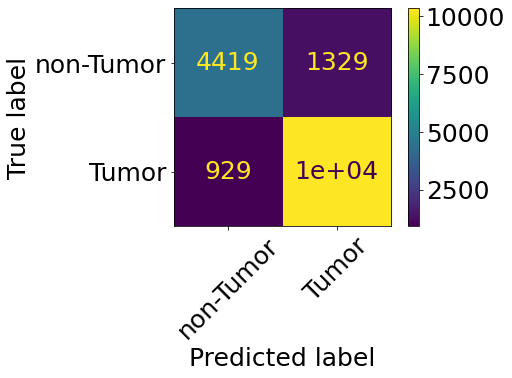

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
# y_true is assigned the ground truth labels from the 'outputs' object, 
# specifically the 'labels_ids' attribute. These are the true labels for the examples in the test dataset
y_pred = outputs.predictions.argmax(1)
# y_pred is assigned the predicted labels obtained from the 'output' objects.
# The 'predictions' attribute of 'outputs' contains the model's predicted probabilities or logits for each class label.
# By applying 'argmad(1)' to the 'predictions' tensor, the index of the highest 
# probability or the predicied label class is obtained for each example

labels = ['non-Tumor','Tumor']
# retrieves the names of the labels from the train_ds dataset object. It assumes that 
# trainn_ds dataset has a 'features' attriute, and within that attribute, a 'label'
# attribute with the label names. These label ames are used to specifiy the display labels for the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# line calculagtes the cofusion matrix using 'confusion_matrix' functiom.
# It takes the ground truth labels ('y_true') and predicted labels ('y_pred')
# as input and computes the confusion matric

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# Here, a ConfusionMatrixDisplay object is created with the confusion matrix (cm) and the display labels (labels) as arguments. 
# The display_labels parameter specifies the names of the labels to be displayed on the confusion matrix.
plt.rcParams.update({'font.size': 25})
disp.plot(xticks_rotation=45)
# Finally, the plot method of the ConfusionMatrixDisplay object is called to visualize the confusion matrix. 
# The xticks_rotation=45 argument is used to rotate the x-axis labels by 45 degrees for better readability.


In [15]:
from datasets import load_metric
metric = load_metric('f1')

final_score = metric.compute(predictions=y_pred, references=y_true)
final_score

/tmp/ipykernel_183252/2731224149.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('f1')


{'f1': 0.9015607289214402}

(array([ 5748.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11269.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

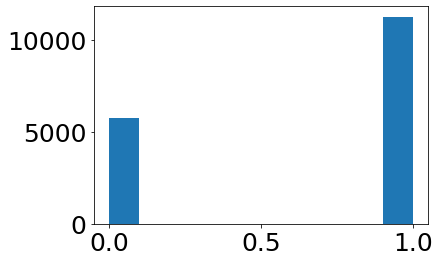

In [16]:
import matplotlib.pyplot as plt

plt.hist(y_true)

In [17]:
#pip install transformers[torch]

In [18]:
#
#import sys
#sys.exit()

In [19]:
# import cv2
# import os
# # the line import cv2 imports the OpenCV library, 
# # which provides computer vision and image processing functions.
# if not os.path.exists(f'{data_set}_tumorPred_validation_img_{tst_patient}/'):
#     os.mkdir(f'{data_set}_tumorPred_validation_img_{tst_patient}/')

# # Prepare Model
# #config = CONFIGS["ViT-B_16"]
# # model = VisionTransformer(config, num_classes=1000, zero_head=False, img_size=224, vis=True)
# # model.load_from(np.load("attention_data/ViT-B_16-224.npz"))
# # model.eval()
# from torchvision import transforms

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
# #     Resizes the input image to a size of 224x224 pixels.
#     transforms.ToTensor(),
# #     Converts the image to a tensor.
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
# ])
# # Normalizes the tensor image by subtracting the mean and dividing by the standard deviation
# model = model.cuda()

# for i in range(500):
#     im = val_ds[i]['img']
#     im  = im.convert("RGB")
#     # he variable im is assigned the value of test_ds[0]['img'], 
#     # which suggests that it represents an image from a dataset (test_ds).
#     x = transform(im).cuda()
#     # This resizes the image, converts it to a tensor, and normalizes it. 
#     # The resulting tensor is then moved to the GPU (cuda()), assuming a CUDA-enabled device is available.
#     x.size()
#     # The size of the tensor x is printed using x.size().

    
#     # The model variable is assumed to be previously defined and is moved to the GPU using model = model.cuda().
#     outputs = model(x.unsqueeze(0), output_attentions=True)
#     # The model is used to make predictions on the input tensor x with the output_attentions=Trueflag. 
#     # The model likely contains the visual attention mechanism, 
#     # and outputs will contain the output logits and attention matrices.
#     logits, att_mat = outputs.logits, outputs.attentions

#     att_mat = torch.stack(att_mat).squeeze(1)

#     # Average the attention weights across all heads.
#     att_mat = torch.mean(att_mat, dim=1)

#     # To account for residual connections, we add an identity matrix to the
#     # attention matrix and re-normalize the weights.
#     residual_att = torch.eye(att_mat.size(1)).cuda()
#     aug_att_mat = att_mat + residual_att
#     aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

#     # Recursively multiply the weight matrices
#     joint_attentions = torch.zeros(aug_att_mat.size()).cuda()
#     joint_attentions[0] = aug_att_mat[0]

#     for n in range(1, aug_att_mat.size(0)):
#         joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])

#     # Attention from the output token to the input space.
#     v = joint_attentions[-1]
#     grid_size = int(np.sqrt(aug_att_mat.size(-1)))
#     mask = v[0, 1:].reshape(grid_size, grid_size).detach().cpu().numpy()
#     mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
#     result = (mask * im).astype("uint8")
    
#     #print(mask[0,0])
#     #print(mask[0,6])

#     heatmap = cv2.applyColorMap(np.uint8(255*mask), cv2.COLORMAP_JET)
#     heatmap = np.float32(heatmap) / 255
#     heatmap_bgr = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
#     # correction according to @christoph-rackwitz comment
#     heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
#     plt.imshow(heatmap_rgb)
#     cam = heatmap + np.float32(im)
#     plt.imshow(heatmap_rgb)
    
#     #break
    
#     plt.savefig(f'{data_set}_tumorPred_validation_img_{tst_patient}/{test_voxels[i]}_test.png', bbox_inches='tight')



In [20]:
# import cv2
# # the line import cv2 imports the OpenCV library, 
# # which provides computer vision and image processing functions.
# if not os.path.exists(f'{data_set}_tumorPred_train_img_{tst_patient}/'):
#     os.mkdir(f'{data_set}_tumorPred_train_img_{tst_patient}/')


# # Prepare Model
# #config = CONFIGS["ViT-B_16"]
# # model = VisionTransformer(config, num_classes=1000, zero_head=False, img_size=224, vis=True)
# # model.load_from(np.load("attention_data/ViT-B_16-224.npz"))
# # model.eval()
# from torchvision import transforms

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
# #     Resizes the input image to a size of 224x224 pixels.
#     transforms.ToTensor(),
# #     Converts the image to a tensor.
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
# ])
# # Normalizes the tensor image by subtracting the mean and dividing by the standard deviation
# model = model.cuda()

# for i in range(500):
#     im = train_ds[i]['img']
#     im  = im.convert("RGB")
#     # he variable im is assigned the value of test_ds[0]['img'], 
#     # which suggests that it represents an image from a dataset (test_ds).
#     x = transform(im).cuda()
#     # This resizes the image, converts it to a tensor, and normalizes it. 
#     # The resulting tensor is then moved to the GPU (cuda()), assuming a CUDA-enabled device is available.
#     x.size()
#     # The size of the tensor x is printed using x.size().


#     # The model variable is assumed to be previously defined and is moved to the GPU using model = model.cuda().
#     outputs = model(x.unsqueeze(0), output_attentions=True)
#     # The model is used to make predictions on the input tensor x with the output_attentions=Trueflag. 
#     # The model likely contains the visual attention mechanism, 
#     # and outputs will contain the output logits and attention matrices.
#     logits, att_mat = outputs.logits, outputs.attentions

#     att_mat = torch.stack(att_mat).squeeze(1)

#     # Average the attention weights across all heads.
#     att_mat = torch.mean(att_mat, dim=1)

#     # To account for residual connections, we add an identity matrix to the
#     # attention matrix and re-normalize the weights.
#     residual_att = torch.eye(att_mat.size(1)).cuda()
#     aug_att_mat = att_mat + residual_att
#     aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

#     # Recursively multiply the weight matrices
#     joint_attentions = torch.zeros(aug_att_mat.size()).cuda()
#     joint_attentions[0] = aug_att_mat[0]

#     for n in range(1, aug_att_mat.size(0)):
#         joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])

#     # Attention from the output token to the input space.
#     v = joint_attentions[-1]
#     grid_size = int(np.sqrt(aug_att_mat.size(-1)))
#     mask = v[0, 1:].reshape(grid_size, grid_size).detach().cpu().numpy()
#     mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
#     result = (mask * im).astype("uint8")
    
#     #print(mask[0,0])
#     #print(mask[0,6])

#     heatmap = cv2.applyColorMap(np.uint8(255*mask), cv2.COLORMAP_JET)
#     heatmap = np.float32(heatmap) / 255
#     heatmap_bgr = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
#     # correction according to @christoph-rackwitz comment
#     heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
#     cam = heatmap + np.float32(im)
#     plt.imshow(heatmap_rgb)
    
#     plt.savefig(f'{data_set}_tumorPred_train_img_{tst_patient}/{train_voxels[i]}_train.png', bbox_inches='tight')

In [21]:
# heatmap = cv2.applyColorMap(np.uint8(255 * np.ones(32)*1), cv2.COLORMAP_JET)
# plt.imshow(heatmap)


In [22]:
# heatmap = cv2.applyColorMap(np.uint8(255 * np.ones(32)*0), cv2.COLORMAP_JET)
# plt.imshow(heatmap)


In [23]:
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
import cv2

transform = transforms.Compose([
    transforms.Resize((224, 224)),
#     Resizes the input image to a size of 224x224 pixels.
    transforms.ToTensor(),
#     Converts the image to a tensor.
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    #normalize
])


def visualize_attention(model, img_path, discard_ratio = 0.9, head_fusion = 'max'):


    model = model.cuda()

    im = Image.open(img_path).convert('RGB')
    x = transform(im).cuda()
    # This resizes the image, converts it to a tensor, and normalizes it. 
    # The resulting tensor is then moved to the GPU (cuda()), assuming a CUDA-enabled device is available.
    x = transform(im).cuda()
    # This resizes the image, converts it to a tensor, and normalizes it. 
    # The resulting tensor is then moved to the GPU (cuda()), assuming a CUDA-enabled device is available.
    x.size()
    # The size of the tensor x is printed using x.size().


    # The model variable is assumed to be previously defined and is moved to the GPU using model = model.cuda().
    outputs = model(x.unsqueeze(0), output_attentions=True)
    # The model is used to make predictions on the input tensor x with the output_attentions=Trueflag. 
    # The model likely contains the visual attention mechanism, 
    # and outputs will contain the output logits and attention matrices.
    logits, att_mat = outputs.logits, outputs.attentions

    att_mat = torch.stack(att_mat).squeeze(1)

    # Average the attention weights across all heads.
    att_mat = torch.mean(att_mat, dim=1)

    # To account for residual connections, we add an identity matrix to the
    # attention matrix and re-normalize the weights.
    residual_att = torch.eye(att_mat.size(1)).cuda()
    aug_att_mat = att_mat + residual_att
    aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

    # Recursively multiply the weight matrices
    joint_attentions = torch.zeros(aug_att_mat.size()).cuda()
    joint_attentions[0] = aug_att_mat[0]

    for n in range(1, aug_att_mat.size(0)):
        joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])

    # Attention from the output token to the input space.
    v = joint_attentions[-1]
    grid_size = int(np.sqrt(aug_att_mat.size(-1)))
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().cpu().numpy()
    mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
    result = (mask * im).astype("uint8")
    
    #print(mask[0,0])
    #print(mask[0,6])

    heatmap = cv2.applyColorMap(np.uint8(255*mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    heatmap_bgr = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    # correction according to @christoph-rackwitz comment
    heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    return heatmap_rgb           


def visualize_train_validation_att(img_path, vid, img_stage, discard_ratio = 0.9, head_fusion = 'max', saveFig = False):
    if img_stage == 'Stage1':
        heatmap_valid = visualize_attention(model2, img_path, discard_ratio, head_fusion)
        heatmap_train = visualize_attention(model1, img_path, discard_ratio, head_fusion)

    else:
        heatmap_valid = visualize_attention(model1, img_path, discard_ratio, head_fusion)
        heatmap_train = visualize_attention(model2, img_path, discard_ratio, head_fusion)

    
    im = Image.open(img_path).convert('RGB')
    
    font_size = 15

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 12))
    ax1.set_title(vid +' Original')
    ax2.set_title('Train Attention')
    ax3.set_title('Validation Attention')
    
    _ = ax1.imshow(im)
    _ = ax2.imshow(heatmap_train)
    _ = ax3.imshow(heatmap_valid)
    
    
        # Calculate the 2D density
    x = heatmap_train
    y = heatmap_valid
    xy = np.vstack([x.flatten(), y.flatten()])
    density = np.log(np.histogram2d(xy[0], xy[1], bins=50, density=True)[0])
    pcm = ax4.imshow(density, cmap='plasma', origin='lower', aspect='1', extent=[x.min(), x.max(), y.min(), y.max()])
    plt.colorbar(pcm, label='Density', pad=0.04, fraction=0.046, ax = ax4)  # Add a colorbar and adjust its position
    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(x.flatten(), y.flatten())[0, 1]
    print(correlation_coefficient)
    # plt.text(0.02, 0.93, f'r = {correlation_coefficient:.2f}',
    #          transform=plt.gca().transAxes, fontsize=18, bbox=dict(facecolor='white', alpha=0.8))
    ax4.set_xlabel("Training Attention", fontsize = font_size)
    ax4.set_ylabel("Validation Attention",fontsize = font_size)
    ax4.set_title(f"TAVAC (r = {correlation_coefficient:.2f})")
    fig.tight_layout()
    
    #for category in range(df_Y.shape[1]):
        
        #visualize_grad_attention_label(model, img_path, category, discard_ratio = discard_ratio)
        

In [24]:
model_file1 = "../../saved_models/ViT_pretrained_tumorPrediction_"+data_set+"_Stage1.pt"
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'
print(model_file1)
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model1 = torch.load(model_file1, map_location=device)
model1.eval()
# this code imports the torch library 

model_file2 = "../../saved_models/ViT_pretrained_tumorPrediction_"+data_set+"_Stage2.pt"
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'
print(model_file2)
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model2 = torch.load(model_file2, map_location=device)
model2.eval()
# this code imports the torch library 



../../saved_models/ViT_pretrained_tumorPrediction_st-net_Stage1.pt
../../saved_models/ViT_pretrained_tumorPrediction_st-net_Stage2.pt


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

In [25]:
trainer1 = Trainer(
    model1,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    
)

trainer2 = Trainer(
    model2,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    
)

outputs_1_tr = trainer1.predict(train_ds)
outputs_1_val = trainer1.predict(val_ds)
outputs_2_tr = trainer2.predict(train_ds)
outputs_2_val = trainer2.predict(val_ds)

def get_labels_by_id(voxel_id, stage='Stage1'):
    
    if stage == 'Stage1':
        
        outputs = outputs_1_tr
        y_true = outputs.label_ids
        # y_true is assigned the ground truth labels from the 'outputs' object, 
        # specifically the 'labels_ids' attribute. These are the true labels for the examples in the test dataset
        y_pred = outputs.predictions.argmax(1)
        print('True label:')
        print(y_true[train_voxels == voxel_id])
        print('Train prediction')
        print(y_pred[train_voxels == voxel_id])

        outputs = outputs_2_tr
        # y_true is assigned the ground truth labels from the 'outputs' object, 
        # specifically the 'labels_ids' attribute. These are the true labels for the examples in the test dataset
        y_pred = outputs.predictions.argmax(1)
        print('Val prediction')
        print(y_pred[train_voxels == voxel_id])
        
    else:
        outputs = outputs_1_val
        y_true = outputs.label_ids
        # y_true is assigned the ground truth labels from the 'outputs' object, 
        # specifically the 'labels_ids' attribute. These are the true labels for the examples in the test dataset
        y_pred = outputs.predictions.argmax(1)
        
        print('True label:')

        print(y_true[test_voxels == voxel_id])
        
        print('Val prediction')
        print(y_pred[test_voxels == voxel_id])

        outputs = outputs_2_val
        # y_true is assigned the ground truth labels from the 'outputs' object, 
        # specifically the 'labels_ids' attribute. These are the true labels for the examples in the test dataset
        y_pred = outputs.predictions.argmax(1)
        print('Train prediction')
        print(y_pred[test_voxels == voxel_id])

In [26]:
plt.rcParams.update({'font.size': 13})

True label:
[1]
Train prediction
[1]
Val prediction
[1]


/tmp/ipykernel_183252/850065768.py:103: RuntimeWarning: divide by zero encountered in log
  density = np.log(np.histogram2d(xy[0], xy[1], bins=50, density=True)[0])


0.31489779539653123


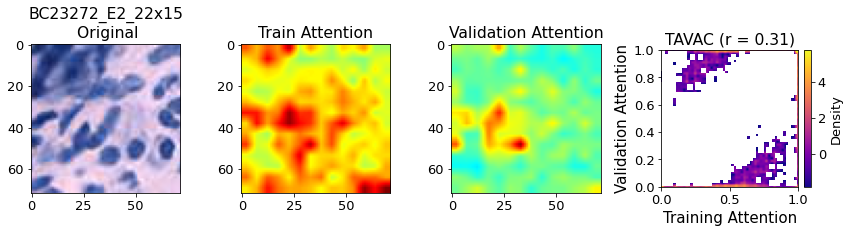

In [27]:
data_dir_deepspace = '/projects/activities/deepspace/team/yue/data/stnet-data/'
patient_rep = 'BC23272_E2'
spot_id = '22x15'
img_path = data_dir_deepspace+patient_rep+"/voxel_pics/"+spot_id+".png"

discard_ratio = 0.9
voxel_id = patient_rep + '_' + spot_id
get_labels_by_id(voxel_id, stage='Stage1')

visualize_train_validation_att(img_path, voxel_id+'\n', 'Stage1')

BC23377_C1_18x17
0.6165775603239387
True label:
[1]
Train prediction
[1]
Val prediction
[1]


/tmp/ipykernel_183252/850065768.py:103: RuntimeWarning: divide by zero encountered in log
  density = np.log(np.histogram2d(xy[0], xy[1], bins=50, density=True)[0])


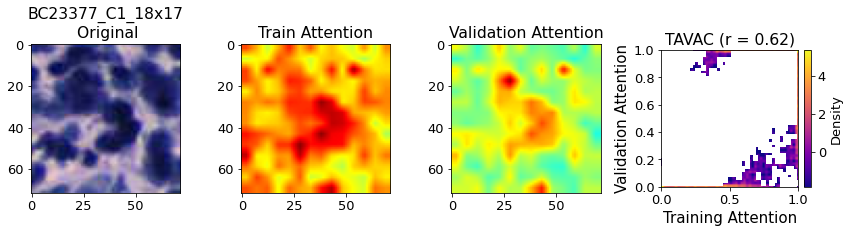

In [44]:
data_dir_deepspace = '/projects/activities/deepspace/team/yue/data/stnet-data/'
patient_rep = 'BC23377_C1'
spot_id = '18x17'
img_path = data_dir_deepspace+patient_rep+"/voxel_pics/"+spot_id+".png"

voxel_id = patient_rep + '_' + spot_id
print(voxel_id)
visualize_train_validation_att(img_path, voxel_id+'\n', 'Stage1')
get_labels_by_id(voxel_id, stage='Stage1')



In [32]:
tavac_df = pd.read_csv('../../output/stnet_tavac.csv')
tavac_df

,spot_id,TAVAC,spot_id.1,stage
0,BC23287_C2_8x19,0.995555,BC23287_C2_8x19,Stage2
1,BC23287_C1_13x27,0.995031,BC23287_C1_13x27,Stage2
2,BC23287_C2_10x17,0.994790,BC23287_C2_10x17,Stage2
3,BC23287_D1_16x21,0.994525,BC23287_D1_16x21,Stage2
4,BC24044_E1_21x28,0.992082,BC24044_E1_21x28,Stage1
5,BC23287_C2_5x15,0.992039,BC23287_C2_5x15,Stage2
6,BC23287_C1_14x27,0.991935,BC23287_C1_14x27,Stage2
7,BC23287_C2_13x18,0.991695,BC23287_C2_13x18,Stage2
8,BC23287_C1_3x31,0.991186,BC23287_C1_3x31,Stage2
9,BC23287_C1_15x31,0.990681,BC23287_C1_15x31,Stage2


In [33]:
tavac_df.loc[tavac_df.spot_id == 'BC24044_D2_18x16']

,spot_id,TAVAC,spot_id.1,stage
49,BC24044_D2_18x16,0.974977,BC24044_D2_18x16,Stage1


In [1]:
# plt.rcParams.update({'font.size': 13})

# data_dir_deepspace = '/projects/activities/deepspace/team/yue/data/stnet-data/'

# for i in range(1000):
    
#     sp = tavac_df.spot_id[i]
#     print(sp)
#     ar = sp.split('_')
#     patient_rep = ar[0]+'_'+ar[1]
#     spot_id = ar[2]

#     img_path = data_dir_deepspace+patient_rep+"/voxel_pics/"+spot_id+".png"

#     discard_ratio = 0.9
#     voxel_id = patient_rep + '_' + spot_id
#     visualize_train_validation_att(img_path, voxel_id+'\n', tavac_df.stage[i], discard_ratio)


#     #get_labels_by_id(voxel_id, stage=tavac_df.stage[i])

In [35]:
# import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

# im = train_ds[i]['img']

# ax1.set_title('Original')
# ax2.set_title('Attention Map')
# _ = ax1.imshow(im)
# _ = ax2.imshow(result)

In [36]:
train_voxels[499]

'BC23810_E2_25x23'

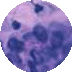

In [37]:
train_ds[499]['img']